In [79]:
import pandas as pd
import os
import numpy as np
from IPython.display import Image
import jdatetime
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations



def reshape_fa(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


def to_jalali(date):
    return jdatetime.datetime.fromgregorian(datetime=date).strftime('%Y/%m/%d')


current_dir = os.getcwd()
print(current_dir)  
output_folder = os.path.join(current_dir, 'files')
os.makedirs(output_folder, exist_ok=True) 



data = pd.read_excel('Data.xlsx')
csv_data = data.to_csv('salesData.csv', index=False,encoding='utf-8-sig')
df = pd.read_csv('salesData.csv')
df 


D:\MFTProject\SLSProject


InvoiceID  CompanyRef  CurrencyRef  Number                     Date  \
0          1077           1            1   26719  2023-01-28 00:00:00.000   
1          1243           1            1   26805  2023-05-01 00:00:00.000   
2          1364           1            1   11195  2023-06-11 00:00:00.000   
3          1364           1            1   11195  2023-06-11 00:00:00.000   
4          1364           1            1   11195  2023-06-11 00:00:00.000   
...         ...         ...          ...     ...                      ...   
8152       4192           1            1   27694  2024-10-15 00:00:00.000   
8153       4192           1            1   27694  2024-10-15 00:00:00.000   
8154       4192           1            1   27694  2024-10-15 00:00:00.000   
8155       4192           1            1   27694  2024-10-15 00:00:00.000   
8156       4192           1            1   27694  2024-10-15 00:00:00.000   

      CustomerRef  BrokerRef  Creator  PayerType  InvoicePrice  ...  \
0           93418          5     8955          1  0.000000e+00  ...   
1           14449          1     8959          1  0.000000e+00  ...   
2           18866          1     8965          1  0.000000e+00  ...   
3           18866          1     8965          1  0.000000e+00  ...   
4           18866          1     8965          1  0.000000e+00  ...   
...           ...        ...      ...        ...           ...  ...   
8152        17909          1     8959          1  2.079059e+12  ...   
8153        17909          1     8959          1  2.079059e+12  ...   
8154        17909          1     8959          1  2.079059e+12  ...   
8155        17909          1     8959          1  2.079059e+12  ...   
8156        17909          1     8959          1  2.079059e+12  ...   

      ProductRef  Quantity  MajorUnitQuantity  InitialQuantity  PriceBaseFee  \
0            867     480.0              480.0            480.0  0.000000e+00   
1            714      11.0               11.0             11.0  0.000000e+00   
2          48891       1.0                1.0              1.0  0.000000e+00   
3          48891       1.0                1.0              1.0  0.000000e+00   
4          48891       1.0                1.0              1.0  0.000000e+00   
...          ...       ...                ...              ...           ...   
8152       48965      40.0               40.0             40.0  1.936705e+09   
8153        5044      40.0               40.0             40.0  1.369449e+08   
8154        5044      40.0               40.0             40.0  1.369449e+08   
8155       48968     180.0              180.0            180.0  1.435698e+08   
8156       48968     180.0              180.0            180.0  1.435698e+08   

               Fee         Price  DeliveryAddressRef         SalesArea  \
0     0.000000e+00  0.000000e+00              2118.0          تک فروشی   
1     0.000000e+00  0.000000e+00              1477.0         نمایندگان   
2     0.000000e+00  0.000000e+00              1562.0  خدمات پس از فروش   
3     0.000000e+00  0.000000e+00              1562.0  خدمات پس از فروش   
4     0.000000e+00  0.000000e+00              1562.0  خدمات پس از فروش   
...            ...           ...                 ...               ...   
8152  1.936705e+09  7.746818e+10               496.0         مناقصه ای   
8153  1.369449e+08  5.477796e+09               496.0         مناقصه ای   
8154  1.369449e+08  5.477796e+09               496.0         مناقصه ای   
8155  1.435698e+08  2.584256e+10               496.0         مناقصه ای   
8156  1.435698e+08  2.584256e+10               496.0         مناقصه ای   

      RegionalDivision  
0               اصفهان  
1                کرمان  
2               اردبیل  
3          استان کرمان  
4             بندرعباس  
...                ...  
8152             تهران  
8153       استان تهران  
8154             تهران  
8155       استان تهران  
8156             تهران  

[8157 rows x 29 columns]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8157 entries, 0 to 8156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               8157 non-null   int64  
 1   CompanyRef              8157 non-null   int64  
 2   CurrencyRef             8157 non-null   int64  
 3   Number                  8157 non-null   int64  
 4   Date                    8157 non-null   object 
 5   CustomerRef             8157 non-null   int64  
 6   BrokerRef               8157 non-null   int64  
 7   Creator                 8157 non-null   int64  
 8   PayerType               8157 non-null   int64  
 9   InvoicePrice            8157 non-null   float64
 10  InvoiceAdditionAmount   8157 non-null   float64
 11  InvoiceReductionAmount  8157 non-null   float64
 12  InvoiceNetPrice         8157 non-null   float64
 13  EffectiveNetPrice       8157 non-null   float64
 14  InvoiceStauts           8157 non-null   

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>حذف ستون های نامربوط</strong>
</div>

</div>


In [81]:
columns = ['CompanyRef','CurrencyRef','EffectiveNetPrice','MajorUnitQuantity',
           'InitialQuantity','PriceBaseFee','DeliveryAddressRef']
df.drop(columns=columns,inplace=True)
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0          1077   26719  2023-01-28 00:00:00.000        93418          5   
1          1243   26805  2023-05-01 00:00:00.000        14449          1   
2          1364   11195  2023-06-11 00:00:00.000        18866          1   
3          1364   11195  2023-06-11 00:00:00.000        18866          1   
4          1364   11195  2023-06-11 00:00:00.000        18866          1   
...         ...     ...                      ...          ...        ...   
8152       4192   27694  2024-10-15 00:00:00.000        17909          1   
8153       4192   27694  2024-10-15 00:00:00.000        17909          1   
8154       4192   27694  2024-10-15 00:00:00.000        17909          1   
8155       4192   27694  2024-10-15 00:00:00.000        17909          1   
8156       4192   27694  2024-10-15 00:00:00.000        17909          1   

      Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0        8955          1  0.000000e+00           0.000000e+00   
1        8959          1  0.000000e+00           0.000000e+00   
2        8965          1  0.000000e+00           0.000000e+00   
3        8965          1  0.000000e+00           0.000000e+00   
4        8965          1  0.000000e+00           0.000000e+00   
...       ...        ...           ...                    ...   
8152     8959          1  2.079059e+12           2.079059e+11   
8153     8959          1  2.079059e+12           2.079059e+11   
8154     8959          1  2.079059e+12           2.079059e+11   
8155     8959          1  2.079059e+12           2.079059e+11   
8156     8959          1  2.079059e+12           2.079059e+11   

      InvoiceReductionAmount  ...             CanceledDate  \
0                        0.0  ...  2023-05-02 12:26:07.207   
1                        0.0  ...  2023-06-17 16:59:46.437   
2                        0.0  ...  2023-06-12 14:30:54.227   
3                        0.0  ...  2023-06-12 14:30:54.227   
4                        0.0  ...  2023-06-12 14:30:54.227   
...                      ...  ...                      ...   
8152                     0.0  ...                      NaN   
8153                     0.0  ...                      NaN   
8154                     0.0  ...                      NaN   
8155                     0.0  ...                      NaN   
8156                     0.0  ...                      NaN   

                 CreationDate InvoiceItemID InvoiceRef  ProductRef  Quantity  \
0     2023-01-28 13:24:16.777          7923       1077         867     480.0   
1     2023-05-31 12:24:22.933          9794       1243         714      11.0   
2     2023-06-11 14:25:15.737         10721       1364       48891       1.0   
3     2023-06-11 14:25:15.737         10721       1364       48891       1.0   
4     2023-06-11 14:25:15.737         10721       1364       48891       1.0   
...                       ...           ...        ...         ...       ...   
8152  2024-10-15 10:57:37.527         37633       4192       48965      40.0   
8153  2024-10-15 10:57:37.527         37634       4192        5044      40.0   
8154  2024-10-15 10:57:37.527         37634       4192        5044      40.0   
8155  2024-10-15 10:57:37.527         37635       4192       48968     180.0   
8156  2024-10-15 10:57:37.527         37635       4192       48968     180.0   

               Fee         Price         SalesArea  RegionalDivision  
0     0.000000e+00  0.000000e+00          تک فروشی            اصفهان  
1     0.000000e+00  0.000000e+00         نمایندگان             کرمان  
2     0.000000e+00  0.000000e+00  خدمات پس از فروش            اردبیل  
3     0.000000e+00  0.000000e+00  خدمات پس از فروش       استان کرمان  
4     0.000000e+00  0.000000e+00  خدمات پس از فروش          بندرعباس  
...            ...           ...               ...               ...  
8152  1.936705e+09  7.746818e+10         مناقصه ای             تهران  
8153  1.369449e+08  5.477796e+09      

In [82]:
df.isna().sum()

InvoiceID                    0
Number                       0
Date                         0
CustomerRef                  0
BrokerRef                    0
Creator                      0
PayerType                    0
InvoicePrice                 0
InvoiceAdditionAmount        0
InvoiceReductionAmount       0
InvoiceNetPrice              0
InvoiceStauts                0
CanceledDate              8019
CreationDate                 0
InvoiceItemID                0
InvoiceRef                   0
ProductRef                   0
Quantity                     0
Fee                          0
Price                        0
SalesArea                    0
RegionalDivision             0
dtype: int64

In [83]:
df = df[df['CanceledDate'].isna()]
df = df.drop(columns=['CanceledDate'])
df



InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
137        4524   12776  2024-12-09 00:00:00.000        20151         14   
138        3104   12130  2024-03-04 00:00:00.000        93882         13   
139        2685   11886  2024-01-09 00:00:00.000        93817         13   
140        1867   11413  2023-08-22 00:00:00.000        20151         13   
141        1884   11417  2023-08-26 00:00:00.000        20151         13   
...         ...     ...                      ...          ...        ...   
8152       4192   27694  2024-10-15 00:00:00.000        17909          1   
8153       4192   27694  2024-10-15 00:00:00.000        17909          1   
8154       4192   27694  2024-10-15 00:00:00.000        17909          1   
8155       4192   27694  2024-10-15 00:00:00.000        17909          1   
8156       4192   27694  2024-10-15 00:00:00.000        17909          1   

      Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
137      8965          1  1.600000e+06           1.600000e+05   
138      8965          1  2.290000e+06           2.061000e+05   
139      8965          1  3.305000e+06           2.974500e+05   
140      8965          1  4.000000e+06           3.600000e+05   
141      8965          1  4.000000e+06           3.600000e+05   
...       ...        ...           ...                    ...   
8152     8959          1  2.079059e+12           2.079059e+11   
8153     8959          1  2.079059e+12           2.079059e+11   
8154     8959          1  2.079059e+12           2.079059e+11   
8155     8959          1  2.079059e+12           2.079059e+11   
8156     8959          1  2.079059e+12           2.079059e+11   

      InvoiceReductionAmount  ...            InvoiceStauts  \
137                      0.0  ...  Registred by Accounting   
138                      0.0  ...  Registred by Accounting   
139                      0.0  ...  Registred by Accounting   
140                      0.0  ...  Registred by Accounting   
141                      0.0  ...  Registred by Accounting   
...                      ...  ...                      ...   
8152                     0.0  ...  Registred by Accounting   
8153                     0.0  ...  Registred by Accounting   
8154                     0.0  ...  Registred by Accounting   
8155                     0.0  ...  Registred by Accounting   
8156                     0.0  ...  Registred by Accounting   

                 CreationDate InvoiceItemID  InvoiceRef  ProductRef  Quantity  \
137   2024-12-09 09:27:40.597         40184        4524       48933       1.0   
138   2024-03-04 08:38:13.067         28012        3104       48935       1.0   
139   2024-01-09 11:41:41.177         24582        2685       48929       1.0   
140   2023-08-22 14:46:09.010         16946        1867       48891       1.0   
141   2023-08-26 10:04:04.550         17195        1884       48891       1.0   
...                       ...           ...         ...         ...       ...   
8152  2024-10-15 10:57:37.527         37633        4192       48965      40.0   
8153  2024-10-15 10:57:37.527         37634        4192        5044      40.0   
8154  2024-10-15 10:57:37.527         37634        4192        5044      40.0   
8155  2024-10-15 10:57:37.527         37635        4192       48968     180.0   
8156  2024-10-15 10:57:37.527         37635        4192       48968     180.0   

               Fee         Price         SalesArea RegionalDivision  
137   1.600000e+06  1.600000e+06  خدمات پس از فروش            تهران  
138   2.290000e+06  2.290000e+06  خدمات پس از فروش            تهران  
139   3.305000e+06  3.305000e+06  خدمات پس از فروش            گرگان  
140   4.000000e+06  4.000000e+06  خدمات پس از فروش            تهران  
141   4.000000e+06  4.000000e+06  خدمات پس از فروش            تهران  
...            ...           ...               ...              ...  
8152  1.936705e+09  7.746818e+10         مناقصه ای            تهران  
8153  1.369449e+08  5.477796e+09  

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8019 entries, 137 to 8156
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               8019 non-null   int64  
 1   Number                  8019 non-null   int64  
 2   Date                    8019 non-null   object 
 3   CustomerRef             8019 non-null   int64  
 4   BrokerRef               8019 non-null   int64  
 5   Creator                 8019 non-null   int64  
 6   PayerType               8019 non-null   int64  
 7   InvoicePrice            8019 non-null   float64
 8   InvoiceAdditionAmount   8019 non-null   float64
 9   InvoiceReductionAmount  8019 non-null   float64
 10  InvoiceNetPrice         8019 non-null   float64
 11  InvoiceStauts           8019 non-null   object 
 12  CreationDate            8019 non-null   object 
 13  InvoiceItemID           8019 non-null   int64  
 14  InvoiceRef              8019 non-null   int

In [85]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

InvoiceID: min=62, max=5173, dtype=int64
Number: min=11171, max=27960, dtype=int64
CustomerRef: min=3, max=94414, dtype=int64
BrokerRef: min=1, max=15, dtype=int64
Creator: min=1, max=9081, dtype=int64
PayerType: min=1, max=3, dtype=int64
InvoicePrice: min=1600000.0, max=2079059364000.0, dtype=float64
InvoiceAdditionAmount: min=160000.0, max=207905936400.0, dtype=float64
InvoiceReductionAmount: min=0.0, max=2370000000.0, dtype=float64
InvoiceNetPrice: min=1760000.0, max=2286965300400.0, dtype=float64
InvoiceItemID: min=191, max=45750, dtype=int64
InvoiceRef: min=62, max=5173, dtype=int64
ProductRef: min=41, max=49319, dtype=int64
Quantity: min=0.7, max=17780.0, dtype=float64
Fee: min=45871.0, max=96636005000.0, dtype=float64
Price: min=312000.0, max=852000000000.0, dtype=float64


In [86]:
lbe = LabelEncoder()
df['SalesAreaNumber'] = lbe.fit_transform(df['SalesArea'])
df 

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
137        4524   12776  2024-12-09 00:00:00.000        20151         14   
138        3104   12130  2024-03-04 00:00:00.000        93882         13   
139        2685   11886  2024-01-09 00:00:00.000        93817         13   
140        1867   11413  2023-08-22 00:00:00.000        20151         13   
141        1884   11417  2023-08-26 00:00:00.000        20151         13   
...         ...     ...                      ...          ...        ...   
8152       4192   27694  2024-10-15 00:00:00.000        17909          1   
8153       4192   27694  2024-10-15 00:00:00.000        17909          1   
8154       4192   27694  2024-10-15 00:00:00.000        17909          1   
8155       4192   27694  2024-10-15 00:00:00.000        17909          1   
8156       4192   27694  2024-10-15 00:00:00.000        17909          1   

      Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
137      8965          1  1.600000e+06           1.600000e+05   
138      8965          1  2.290000e+06           2.061000e+05   
139      8965          1  3.305000e+06           2.974500e+05   
140      8965          1  4.000000e+06           3.600000e+05   
141      8965          1  4.000000e+06           3.600000e+05   
...       ...        ...           ...                    ...   
8152     8959          1  2.079059e+12           2.079059e+11   
8153     8959          1  2.079059e+12           2.079059e+11   
8154     8959          1  2.079059e+12           2.079059e+11   
8155     8959          1  2.079059e+12           2.079059e+11   
8156     8959          1  2.079059e+12           2.079059e+11   

      InvoiceReductionAmount  ...             CreationDate InvoiceItemID  \
137                      0.0  ...  2024-12-09 09:27:40.597         40184   
138                      0.0  ...  2024-03-04 08:38:13.067         28012   
139                      0.0  ...  2024-01-09 11:41:41.177         24582   
140                      0.0  ...  2023-08-22 14:46:09.010         16946   
141                      0.0  ...  2023-08-26 10:04:04.550         17195   
...                      ...  ...                      ...           ...   
8152                     0.0  ...  2024-10-15 10:57:37.527         37633   
8153                     0.0  ...  2024-10-15 10:57:37.527         37634   
8154                     0.0  ...  2024-10-15 10:57:37.527         37634   
8155                     0.0  ...  2024-10-15 10:57:37.527         37635   
8156                     0.0  ...  2024-10-15 10:57:37.527         37635   

     InvoiceRef  ProductRef  Quantity           Fee         Price  \
137        4524       48933       1.0  1.600000e+06  1.600000e+06   
138        3104       48935       1.0  2.290000e+06  2.290000e+06   
139        2685       48929       1.0  3.305000e+06  3.305000e+06   
140        1867       48891       1.0  4.000000e+06  4.000000e+06   
141        1884       48891       1.0  4.000000e+06  4.000000e+06   
...         ...         ...       ...           ...           ...   
8152       4192       48965      40.0  1.936705e+09  7.746818e+10   
8153       4192        5044      40.0  1.369449e+08  5.477796e+09   
8154       4192        5044      40.0  1.369449e+08  5.477796e+09   
8155       4192       48968     180.0  1.435698e+08  2.584256e+10   
8156       4192       48968     180.0  1.435698e+08  2.584256e+10   

             SalesArea  RegionalDivision SalesAreaNumber  
137   خدمات پس از فروش             تهران               1  
138   خدمات پس از فروش             تهران               1  
139   خدمات پس از فروش             گرگان               1  
140   خدمات پس از فروش             تهران               1  
141   خدمات پس از فروش             تهران               1  
...                ...               ...             ...  
8152         مناقصه ای             تهران               2  
8153         مناقصه ای       استان تهران               2  
8154         مناقصه ای             تهرا

In [87]:
df['RegionalDivision'] = df['RegionalDivision'].str.strip()  
df['RegionalDivision'] = df['RegionalDivision'].str.replace(r'[^آ-یa-zA-Z0-9\s]', '', regex=True)  
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
137        4524   12776  2024-12-09 00:00:00.000        20151         14   
138        3104   12130  2024-03-04 00:00:00.000        93882         13   
139        2685   11886  2024-01-09 00:00:00.000        93817         13   
140        1867   11413  2023-08-22 00:00:00.000        20151         13   
141        1884   11417  2023-08-26 00:00:00.000        20151         13   
...         ...     ...                      ...          ...        ...   
8152       4192   27694  2024-10-15 00:00:00.000        17909          1   
8153       4192   27694  2024-10-15 00:00:00.000        17909          1   
8154       4192   27694  2024-10-15 00:00:00.000        17909          1   
8155       4192   27694  2024-10-15 00:00:00.000        17909          1   
8156       4192   27694  2024-10-15 00:00:00.000        17909          1   

      Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
137      8965          1  1.600000e+06           1.600000e+05   
138      8965          1  2.290000e+06           2.061000e+05   
139      8965          1  3.305000e+06           2.974500e+05   
140      8965          1  4.000000e+06           3.600000e+05   
141      8965          1  4.000000e+06           3.600000e+05   
...       ...        ...           ...                    ...   
8152     8959          1  2.079059e+12           2.079059e+11   
8153     8959          1  2.079059e+12           2.079059e+11   
8154     8959          1  2.079059e+12           2.079059e+11   
8155     8959          1  2.079059e+12           2.079059e+11   
8156     8959          1  2.079059e+12           2.079059e+11   

      InvoiceReductionAmount  ...             CreationDate InvoiceItemID  \
137                      0.0  ...  2024-12-09 09:27:40.597         40184   
138                      0.0  ...  2024-03-04 08:38:13.067         28012   
139                      0.0  ...  2024-01-09 11:41:41.177         24582   
140                      0.0  ...  2023-08-22 14:46:09.010         16946   
141                      0.0  ...  2023-08-26 10:04:04.550         17195   
...                      ...  ...                      ...           ...   
8152                     0.0  ...  2024-10-15 10:57:37.527         37633   
8153                     0.0  ...  2024-10-15 10:57:37.527         37634   
8154                     0.0  ...  2024-10-15 10:57:37.527         37634   
8155                     0.0  ...  2024-10-15 10:57:37.527         37635   
8156                     0.0  ...  2024-10-15 10:57:37.527         37635   

     InvoiceRef  ProductRef  Quantity           Fee         Price  \
137        4524       48933       1.0  1.600000e+06  1.600000e+06   
138        3104       48935       1.0  2.290000e+06  2.290000e+06   
139        2685       48929       1.0  3.305000e+06  3.305000e+06   
140        1867       48891       1.0  4.000000e+06  4.000000e+06   
141        1884       48891       1.0  4.000000e+06  4.000000e+06   
...         ...         ...       ...           ...           ...   
8152       4192       48965      40.0  1.936705e+09  7.746818e+10   
8153       4192        5044      40.0  1.369449e+08  5.477796e+09   
8154       4192        5044      40.0  1.369449e+08  5.477796e+09   
8155       4192       48968     180.0  1.435698e+08  2.584256e+10   
8156       4192       48968     180.0  1.435698e+08  2.584256e+10   

             SalesArea  RegionalDivision SalesAreaNumber  
137   خدمات پس از فروش             تهران               1  
138   خدمات پس از فروش             تهران               1  
139   خدمات پس از فروش             گرگان               1  
140   خدمات پس از فروش             تهران               1  
141   خدمات پس از فروش             تهران               1  
...                ...               ...             ...  
8152         مناقصه ای             تهران               2  
8153         مناقصه ای       استان تهران               2  
8154         مناقصه ای             تهرا

In [88]:
print(df['RegionalDivision'].unique())

['تهران' 'گرگان' 'ایلام' 'دلیجان' 'اصفهان' 'اردبیل' 'استان کرمان'
 'بندرعباس' 'تبریز' 'تنکابنشهسوار' 'خوی' 'رشت' 'زاهدان' 'زنجان' 'سمنان'
 'سنندج' 'قشم' 'قم' 'کرمان' 'کیش' 'گنبد کاووس' 'مراغه' 'همدان' 'یزد'
 'مشهد' 'اندیمشک' 'ماهدشت' 'استان تهران' 'یاسوج' 'کرج' 'شهریار'
 'علی آباد کتول' 'شیراز' 'شهر قدس' 'ساوه' 'ورامین' 'شهرری' 'شمیرانات'
 'کرج ' 'ساری' 'کرمانشاه' 'بجنورد' 'بابل' 'مرکزی اصفهان' 'زرند' 'اراک'
 'جاجرود' 'قزوین' 'آمل' 'قائمشهر' 'بیرجند' 'پاکدشت' 'فسا' 'استان بوشهر'
 'لنگرود' 'ارومیه' 'بهبهان' 'شهر کرد' 'هشتگرد' 'شوشتر' 'خرمشهر'
 'مرکزی رشت' 'مرکزی کرج' 'نظرآباد' 'مازندران' 'صفادشت' 'خوزستان'
 'بندر لنگه' 'شاهرود' 'محمود آباد' 'خرم آباد' 'مرکزی بوشهر' 'بوشهر'
 'بروجن' 'آباده' 'استان اردبیل' 'خرمدره' 'اهواز' 'بروجرد' 'مریوان'
 'مرکزی قم' 'صایین قلعه' 'نور' 'استان خراسان شمالی' 'بابلسر' 'بندر انزلی'
 'مرند' 'سبزوار' 'مهاباد' 'دورود' 'دماوند' 'اسلامشهر' 'شوش دانیال' 'بومهن']


In [89]:
print(df['RegionalDivision'].value_counts())


RegionalDivision
تهران                 3872
کرمان                  326
اصفهان                 289
یزد                    279
بندرعباس               173
                      ... 
صایین قلعه               1
استان خراسان شمالی       1
دورود                    1
سبزوار                   1
مهاباد                   1
Name: count, Length: 94, dtype: int64


In [90]:
df['RegionalDivisionNumber'] = lbe.fit_transform(df['RegionalDivision'])
df['InvoiceStatusNumber'] = lbe.fit_transform(df['InvoiceStauts'])
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
137        4524   12776  2024-12-09 00:00:00.000        20151         14   
138        3104   12130  2024-03-04 00:00:00.000        93882         13   
139        2685   11886  2024-01-09 00:00:00.000        93817         13   
140        1867   11413  2023-08-22 00:00:00.000        20151         13   
141        1884   11417  2023-08-26 00:00:00.000        20151         13   
...         ...     ...                      ...          ...        ...   
8152       4192   27694  2024-10-15 00:00:00.000        17909          1   
8153       4192   27694  2024-10-15 00:00:00.000        17909          1   
8154       4192   27694  2024-10-15 00:00:00.000        17909          1   
8155       4192   27694  2024-10-15 00:00:00.000        17909          1   
8156       4192   27694  2024-10-15 00:00:00.000        17909          1   

      Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
137      8965          1  1.600000e+06           1.600000e+05   
138      8965          1  2.290000e+06           2.061000e+05   
139      8965          1  3.305000e+06           2.974500e+05   
140      8965          1  4.000000e+06           3.600000e+05   
141      8965          1  4.000000e+06           3.600000e+05   
...       ...        ...           ...                    ...   
8152     8959          1  2.079059e+12           2.079059e+11   
8153     8959          1  2.079059e+12           2.079059e+11   
8154     8959          1  2.079059e+12           2.079059e+11   
8155     8959          1  2.079059e+12           2.079059e+11   
8156     8959          1  2.079059e+12           2.079059e+11   

      InvoiceReductionAmount  ...  InvoiceRef ProductRef Quantity  \
137                      0.0  ...        4524      48933      1.0   
138                      0.0  ...        3104      48935      1.0   
139                      0.0  ...        2685      48929      1.0   
140                      0.0  ...        1867      48891      1.0   
141                      0.0  ...        1884      48891      1.0   
...                      ...  ...         ...        ...      ...   
8152                     0.0  ...        4192      48965     40.0   
8153                     0.0  ...        4192       5044     40.0   
8154                     0.0  ...        4192       5044     40.0   
8155                     0.0  ...        4192      48968    180.0   
8156                     0.0  ...        4192      48968    180.0   

               Fee         Price         SalesArea  RegionalDivision  \
137   1.600000e+06  1.600000e+06  خدمات پس از فروش             تهران   
138   2.290000e+06  2.290000e+06  خدمات پس از فروش             تهران   
139   3.305000e+06  3.305000e+06  خدمات پس از فروش             گرگان   
140   4.000000e+06  4.000000e+06  خدمات پس از فروش             تهران   
141   4.000000e+06  4.000000e+06  خدمات پس از فروش             تهران   
...            ...           ...               ...               ...   
8152  1.936705e+09  7.746818e+10         مناقصه ای             تهران   
8153  1.369449e+08  5.477796e+09         مناقصه ای       استان تهران   
8154  1.369449e+08  5.477796e+09         مناقصه ای             تهران   
8155  1.435698e+08  2.584256e+10         مناقصه ای       استان تهران   
8156  1.435698e+08  2.584256e+10         مناقصه ای             تهران   

      SalesAreaNumber  RegionalDivisionNumber InvoiceStatusNumber  
137                 1                      29                   1  
138                 1                      29                   1  
139                 1                      90                   1  
140                 1                      29                   1  
141                 1                      29                   1  
...               ...                     ...                 ...  
8152                2                      29                   1  
8153                2                       7                   1  
8154  

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8019 entries, 137 to 8156
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               8019 non-null   int64  
 1   Number                  8019 non-null   int64  
 2   Date                    8019 non-null   object 
 3   CustomerRef             8019 non-null   int64  
 4   BrokerRef               8019 non-null   int64  
 5   Creator                 8019 non-null   int64  
 6   PayerType               8019 non-null   int64  
 7   InvoicePrice            8019 non-null   float64
 8   InvoiceAdditionAmount   8019 non-null   float64
 9   InvoiceReductionAmount  8019 non-null   float64
 10  InvoiceNetPrice         8019 non-null   float64
 11  InvoiceStauts           8019 non-null   object 
 12  CreationDate            8019 non-null   object 
 13  InvoiceItemID           8019 non-null   int64  
 14  InvoiceRef              8019 non-null   int

In [92]:
date_columns = ['Date','CreationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')



type_map = {
    np.uint8 : ['BrokerRef','PayerType','RegionalDivisionNumber','SalesAreaNumber','InvoiceStatusNumber'],
    np.uint16 : ['InvoiceID','Number','Creator','InvoiceItemID','InvoiceRef','ProductRef','Quantity'],
    np.uint32 : ['CustomerRef','InvoiceReductionAmount'],
    np.uint64 : ['InvoicePrice','InvoiceAdditionAmount','InvoiceNetPrice','Fee','Price']
}


for dtype,columns in type_map.items():
    for col in columns:
        df[col] = df[col].astype(dtype)
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8019 entries, 137 to 8156
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InvoiceID               8019 non-null   uint16        
 1   Number                  8019 non-null   uint16        
 2   Date                    8019 non-null   datetime64[ns]
 3   CustomerRef             8019 non-null   uint32        
 4   BrokerRef               8019 non-null   uint8         
 5   Creator                 8019 non-null   uint16        
 6   PayerType               8019 non-null   uint8         
 7   InvoicePrice            8019 non-null   uint64        
 8   InvoiceAdditionAmount   8019 non-null   uint64        
 9   InvoiceReductionAmount  8019 non-null   uint32        
 10  InvoiceNetPrice         8019 non-null   uint64        
 11  InvoiceStauts           8019 non-null   object        
 12  CreationDate            8019 non-null   datetime64[

In [93]:
df

InvoiceID  Number       Date  CustomerRef  BrokerRef  Creator  \
137        4524   12776 2024-12-09        20151         14     8965   
138        3104   12130 2024-03-04        93882         13     8965   
139        2685   11886 2024-01-09        93817         13     8965   
140        1867   11413 2023-08-22        20151         13     8965   
141        1884   11417 2023-08-26        20151         13     8965   
...         ...     ...        ...          ...        ...      ...   
8152       4192   27694 2024-10-15        17909          1     8959   
8153       4192   27694 2024-10-15        17909          1     8959   
8154       4192   27694 2024-10-15        17909          1     8959   
8155       4192   27694 2024-10-15        17909          1     8959   
8156       4192   27694 2024-10-15        17909          1     8959   

      PayerType   InvoicePrice  InvoiceAdditionAmount  InvoiceReductionAmount  \
137           1        1600000                 160000                       0   
138           1        2290000                 206100                       0   
139           1        3305000                 297450                       0   
140           1        4000000                 360000                       0   
141           1        4000000                 360000                       0   
...         ...            ...                    ...                     ...   
8152          1  2079059364000           207905936400                       0   
8153          1  2079059364000           207905936400                       0   
8154          1  2079059364000           207905936400                       0   
8155          1  2079059364000           207905936400                       0   
8156          1  2079059364000           207905936400                       0   

      ...  InvoiceRef ProductRef Quantity         Fee        Price  \
137   ...        4524      48933        1     1600000      1600000   
138   ...        3104      48935        1     2290000      2290000   
139   ...        2685      48929        1     3305000      3305000   
140   ...        1867      48891        1     4000000      4000000   
141   ...        1884      48891        1     4000000      4000000   
...   ...         ...        ...      ...         ...          ...   
8152  ...        4192      48965       40  1936704600  77468184000   
8153  ...        4192       5044       40   136944900   5477796000   
8154  ...        4192       5044       40   136944900   5477796000   
8155  ...        4192      48968      180   143569800  25842564000   
8156  ...        4192      48968      180   143569800  25842564000   

             SalesArea  RegionalDivision  SalesAreaNumber  \
137   خدمات پس از فروش             تهران                1   
138   خدمات پس از فروش             تهران                1   
139   خدمات پس از فروش             گرگان                1   
140   خدمات پس از فروش             تهران                1   
141   خدمات پس از فروش             تهران                1   
...                ...               ...              ...   
8152         مناقصه ای             تهران                2   
8153         مناقصه ای       استان تهران                2   
8154         مناقصه ای             تهران                2   
8155         مناقصه ای       استان تهران                2   
8156         مناقصه ای             تهران                2   

      RegionalDivisionNumber InvoiceStatusNumber  
137                       29                   1  
138                       29                   1  
139                       90                   1  
140                       29                   1  
141                       29                   1  
...                      ...                 ...  
8152                      29                   1  
8153                       7                   1  
8154                      29                   1  
8155                       7                   1  
8156                      29                 

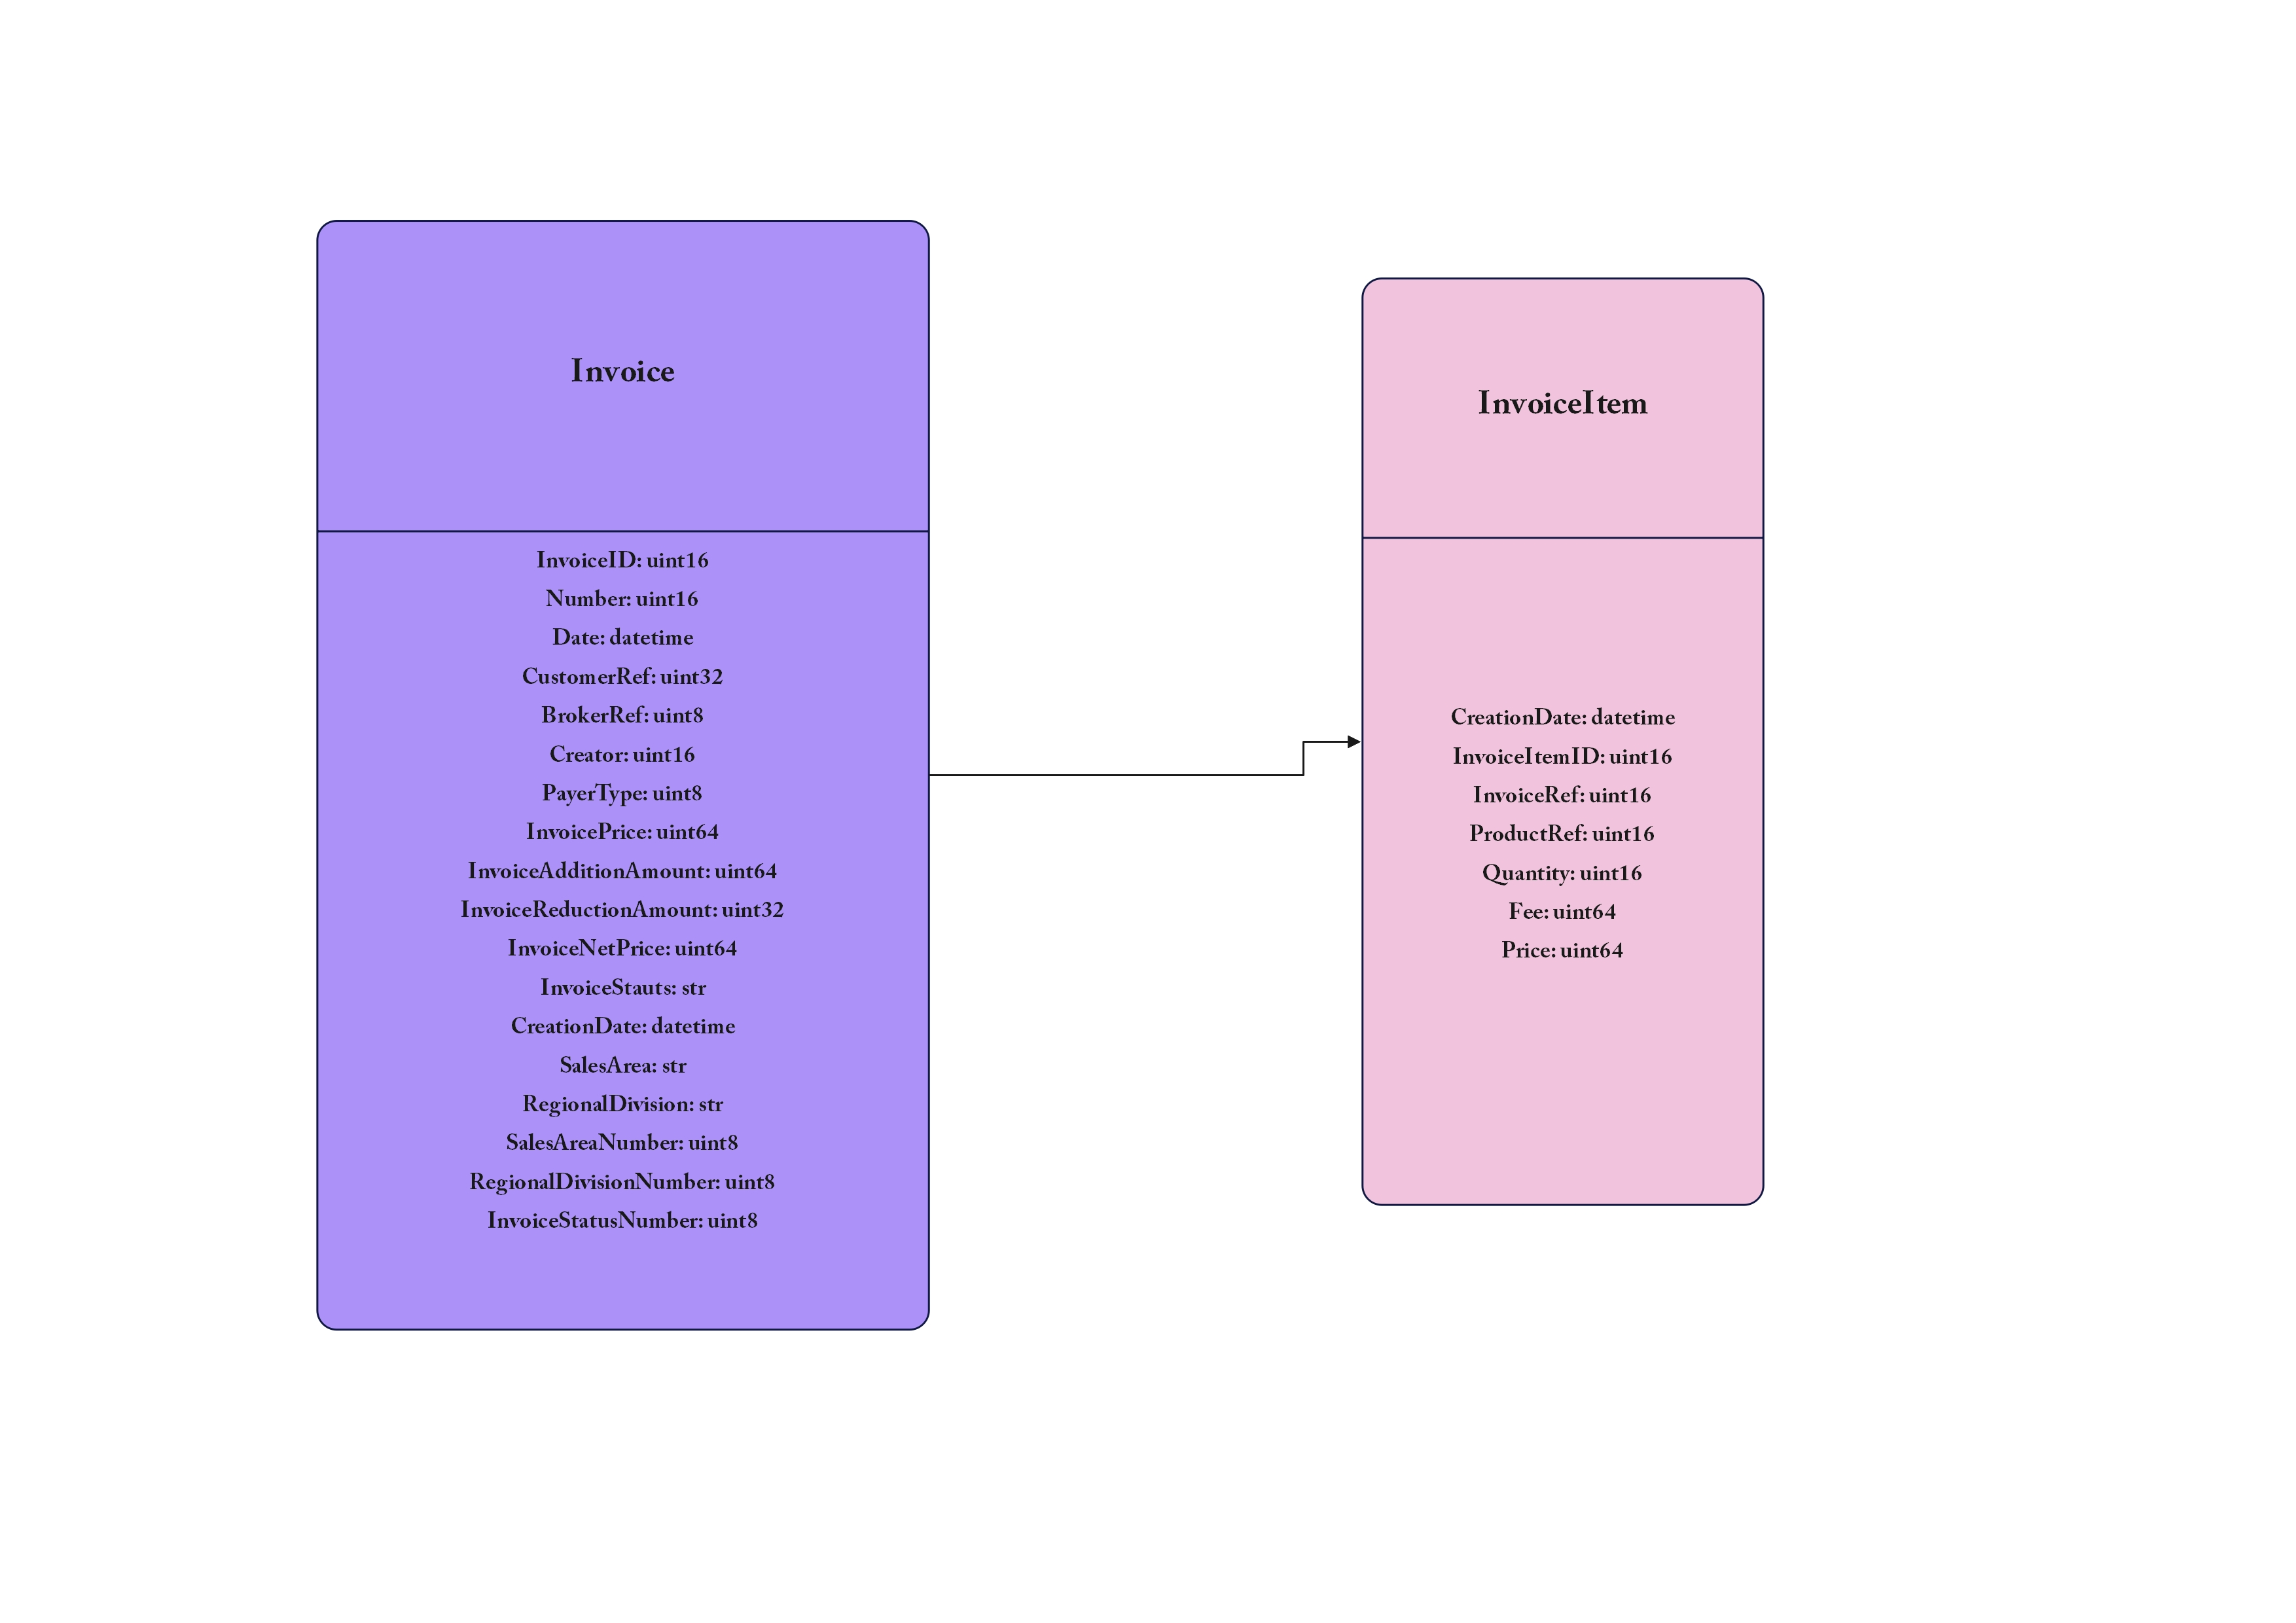

In [94]:
Image(filename='UML.jpg')


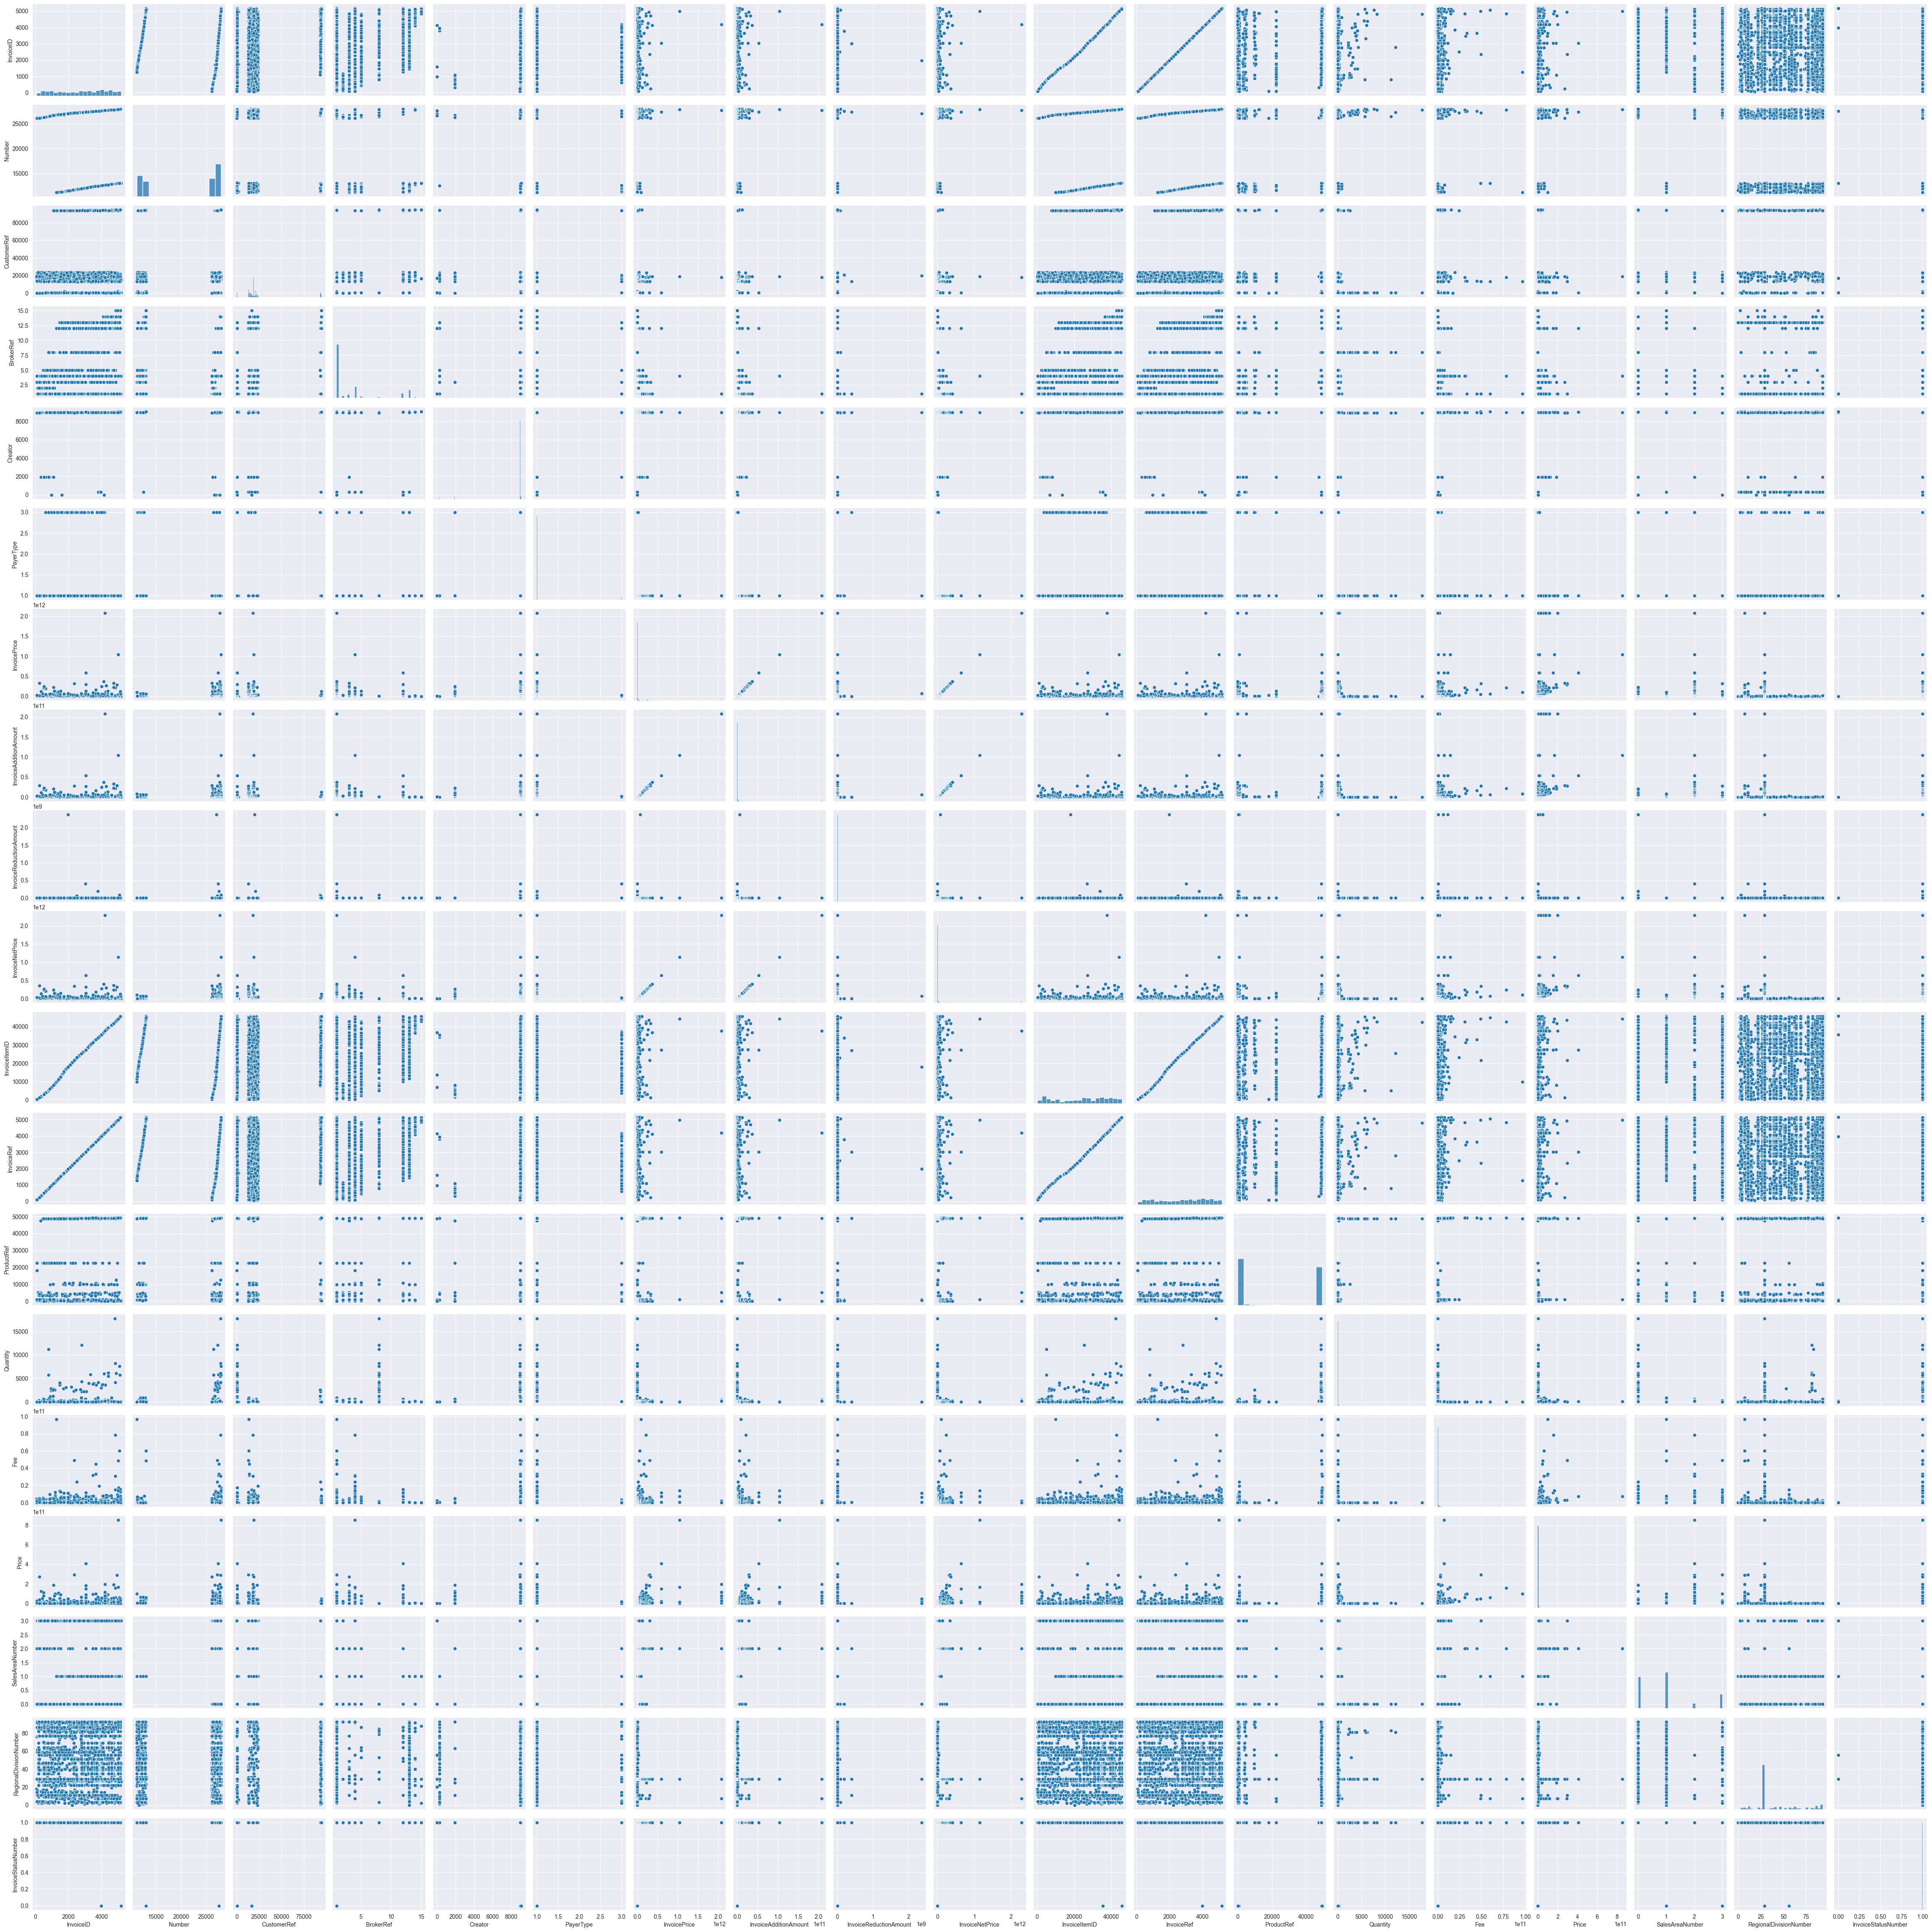

In [95]:
plt.rcParams['figure.figsize'] = [10,5]
sns.pairplot(df)
plt.savefig('DfPairplot.jpg',dpi=150)

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>تبدیل فاکتور و اقلام آن به دیتافریم های جداگانه</strong>
</div>

</div>


In [96]:
invoice_columns = [
    'InvoiceID',
    'Number',
    'Date',
    'CustomerRef',
    'BrokerRef',
    'Creator',
    'PayerType',
    'InvoicePrice',
    'InvoiceAdditionAmount',
    'InvoiceReductionAmount',
    'InvoiceNetPrice',
    'InvoiceStauts',
    'CreationDate',
    'SalesArea',
    'RegionalDivision',
    'SalesAreaNumber',
    'RegionalDivisionNumber',
    'InvoiceStatusNumber'
]

df_invoice = df[invoice_columns].drop_duplicates(subset='InvoiceID')

invoice_item_columns = [
    'InvoiceItemID',
    'InvoiceRef',   
    'ProductRef',
    'Quantity',
    'Fee',
    'Price',
    'CreationDate'
]

df_invoice_items = df[invoice_item_columns]

print(df_invoice,df_invoice_items)





      InvoiceID  Number       Date  CustomerRef  BrokerRef  Creator  \
137        4524   12776 2024-12-09        20151         14     8965   
138        3104   12130 2024-03-04        93882         13     8965   
139        2685   11886 2024-01-09        93817         13     8965   
140        1867   11413 2023-08-22        20151         13     8965   
141        1884   11417 2023-08-26        20151         13     8965   
...         ...     ...        ...          ...        ...      ...   
7992       4716   27815 2025-01-01        18928          1     8959   
8008       4126   27675 2024-09-29        18928          1     8959   
8034       3034   27350 2024-02-21          399         12     9002   
8038       4998   27908 2025-02-23        18806          4     8974   
8043       4192   27694 2024-10-15        17909          1     8959   

      PayerType   InvoicePrice  InvoiceAdditionAmount  InvoiceReductionAmount  \
137           1        1600000                 160000             

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">

<div style="direction: rtl; text-align: right;">
<ul>
  <li>InvoicePrice → ضریب همبستگی 1.0
 مشخصه که InvoicePrice به شدت با InvoiceNetPrice همبستگی داره (فقط تخفیف/افزودنی‌ها ازش کم میشه)</li>
  <li>Quantity → تقریباً 0.0 یا خیلی کم
  تعداد کالا اثر زیادی روی قیمت نهایی نذاشته! شاید به خاطر نوسان بالا در قیمت کالاها</li>
  <li>باقی نمودار فاکتورهای خیلی معناداری برای فروش نیستند</li>
</ul>
</div>

</div>


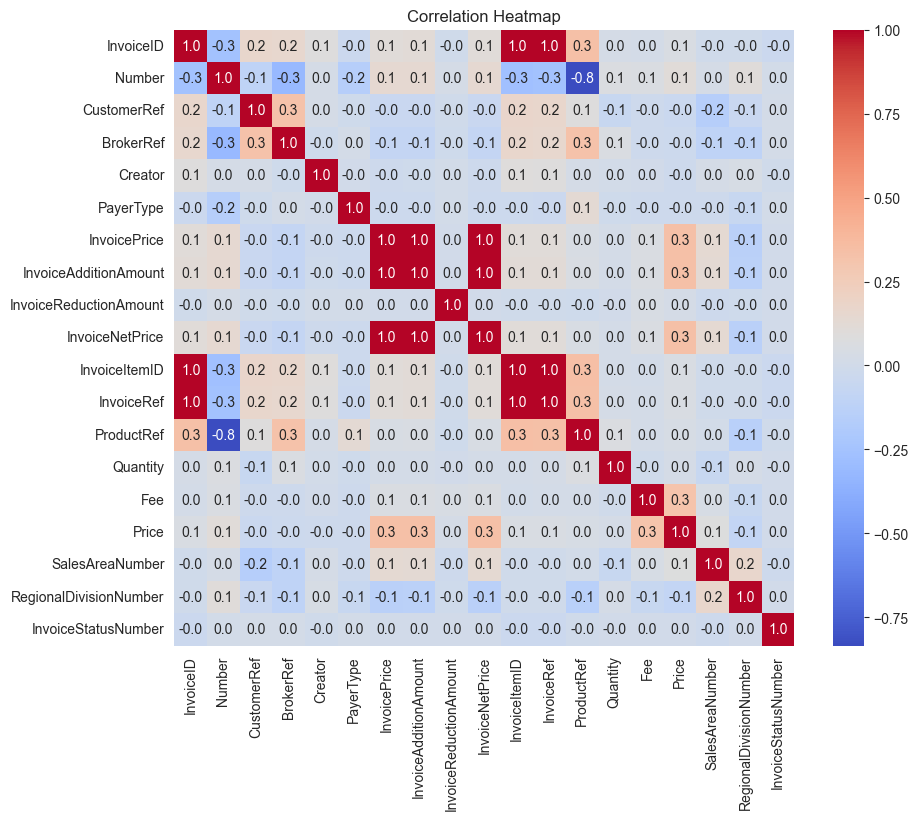

In [97]:
numeric_cols = df.select_dtypes(include=['number']).columns
filtered_df = df[numeric_cols].loc[:, df[numeric_cols].nunique() > 1]
corr = filtered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>جمع فروش براساس ماه و سال</strong>
</div>
</div>

In [98]:
df_invoice['Date_Jalali'] = df_invoice['Date'].apply(to_jalali)
df_invoice['Month_Jalali'] = df_invoice['Date_Jalali'].str[:7] 
df_invoice['Year_Jalali'] = df_invoice['Date_Jalali'].str[:4]


monthly_sales = df_invoice.groupby(df_invoice['Month_Jalali'])['InvoiceNetPrice'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'TotalSales']
monthly_sales = monthly_sales.sort_values('Month')
print('جمع فروش هر ماه:')
print(monthly_sales)

output_path = os.path.join(output_folder, 'monthly_sales_jalali.xlsx')
monthly_sales.to_excel(output_path, index=False)

print('*' * 50)

stat, p = shapiro(monthly_sales['TotalSales'].values)
print(f'Shapiro-Wilk Test: Statistics={stat}, p={p}')
if p > 0.05:
    print("توزیع نرمال است")
else:
    print("توزیع نرمال نیست")


print('*' * 50)

annual_sales = df_invoice.groupby(df_invoice['Year_Jalali'])['InvoiceNetPrice'].sum()
annual_sales = annual_sales.reset_index()
annual_sales.columns = ['Year', 'TotalSales']
print('جمع فروش هر سال:')
print(annual_sales)

output_path = os.path.join(output_folder, 'annual_sales_jalali.xlsx')
annual_sales.to_excel(output_path, index=False)







جمع فروش هر ماه:
      Month     TotalSales
0   1400/11    86418906000
1   1400/12   472676562967
2   1401/01   221527146848
3   1401/02   374716276719
4   1401/03   345000914000
5   1401/04   338374128200
6   1401/05   112800688300
7   1401/06    98994799073
8   1401/07   198882032200
9   1401/08    48567747659
10  1401/09   126492533761
11  1401/10   156953692156
12  1401/11   596768100649
13  1401/12   257529377647
14  1402/01     1674240000
15  1402/02   193653504590
16  1402/03   186435350071
17  1402/04   343139695774
18  1402/05   213725790630
19  1402/06   215402698950
20  1402/07   160253854650
21  1402/08   430993103094
22  1402/09   137056933213
23  1402/10   217959322121
24  1402/11   176349551323
25  1402/12  1491351024819
26  1403/01    33694320000
27  1403/02    58872980720
28  1403/03   161987590483
29  1403/04   528282479570
30  1403/05   114551054188
31  1403/06   388146024505
32  1403/07  2861938031805
33  1403/08   928059379391
34  1403/09    56566986324
35  1403/10

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش کلی در هر سال بر اساس ماه</strong>
</div>
</div>

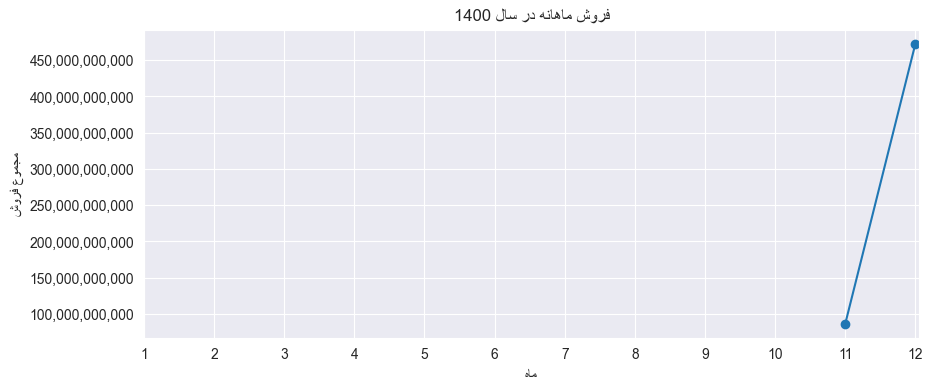

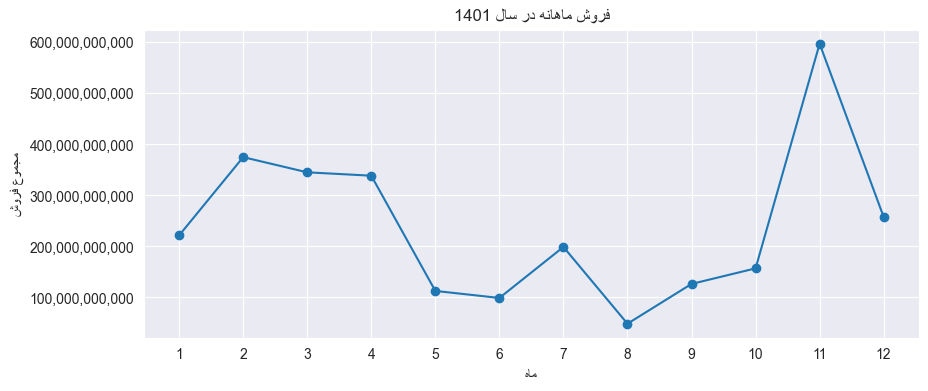

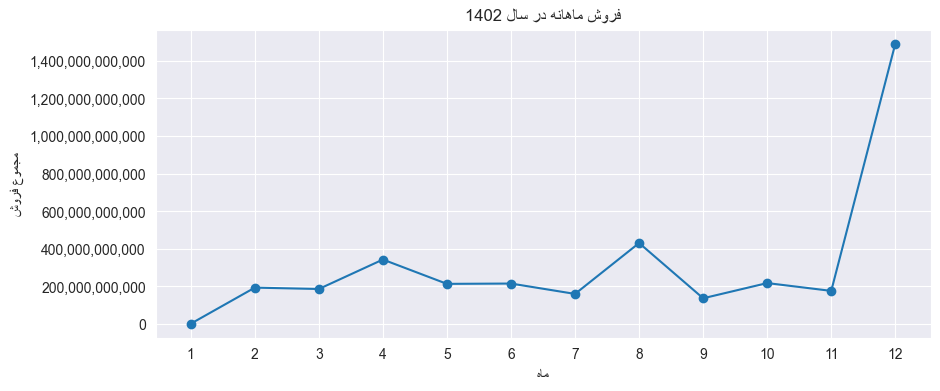

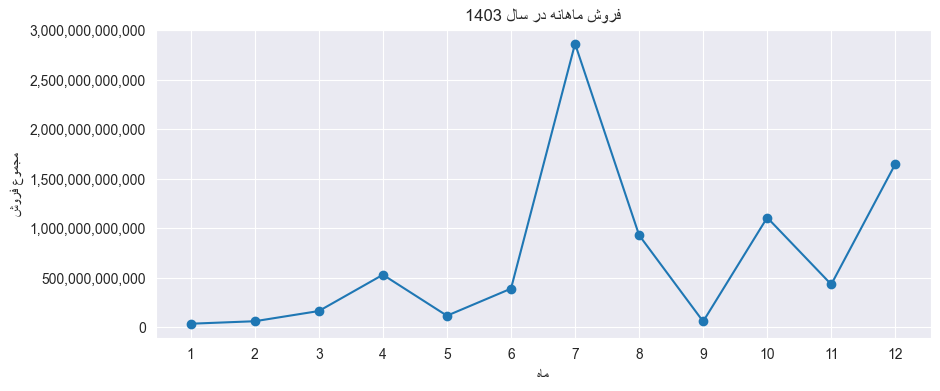

In [99]:
df_invoice['Month_Jalali_Num'] = df_invoice['Date_Jalali'].str[5:7].astype(int)
monthly_yearly_sales = df_invoice.groupby(['Year_Jalali', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()


years = monthly_yearly_sales['Year_Jalali'].unique()

for year in years:
    yearly_data = monthly_yearly_sales[monthly_yearly_sales['Year_Jalali'] == year]
    yearly_data = yearly_data.sort_values('Month_Jalali_Num')
    
 
    yearly_data_plot = yearly_data.set_index('Month_Jalali_Num')
    
    ax = yearly_data_plot['InvoiceNetPrice'].plot(kind='line', marker='o', figsize=(10, 4))
    plt.title(reshape_fa(f'فروش ماهانه در سال {year}'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel(reshape_fa('ماه'))
    ax.set_ylabel(reshape_fa('مجموع فروش'))
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    plt.show()


In [100]:
grouped = df_invoice.groupby(['Year_Jalali', 'SalesArea', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()
grouped.columns = ['Year', 'SalesArea', 'Month', 'TotalSales']

years = grouped['Year'].unique()
sales_areas = grouped['SalesArea'].unique()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه در هر سال بر اساس حوزه فروش</strong>
</div>
</div>

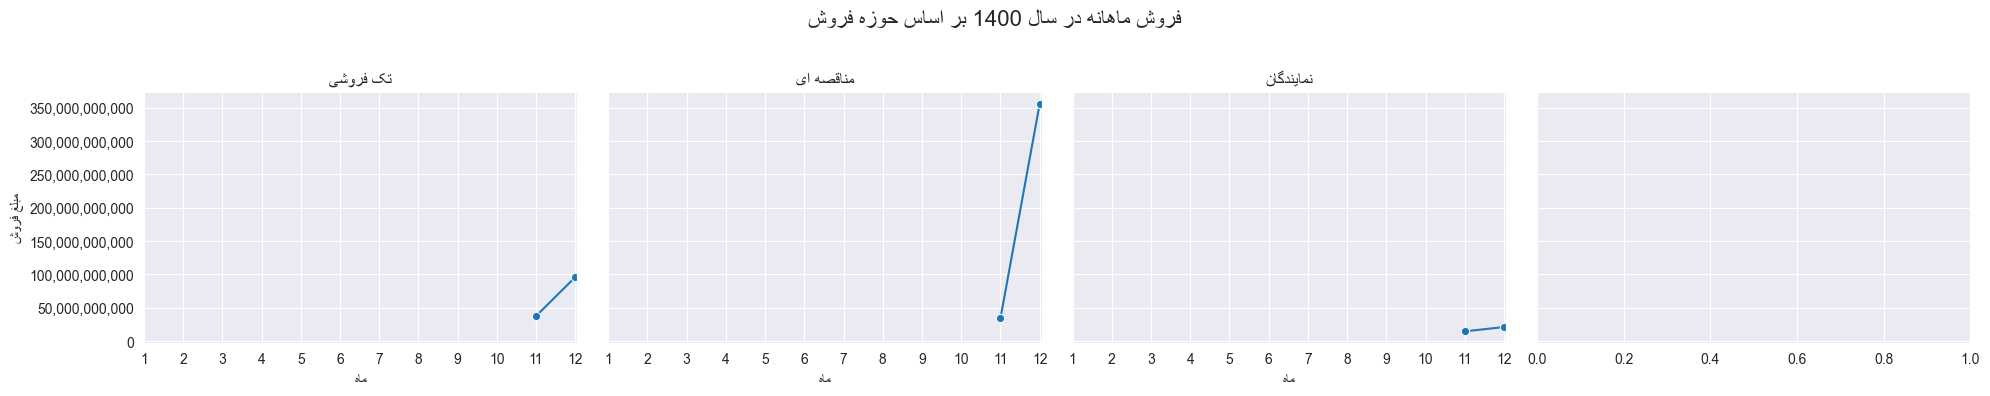

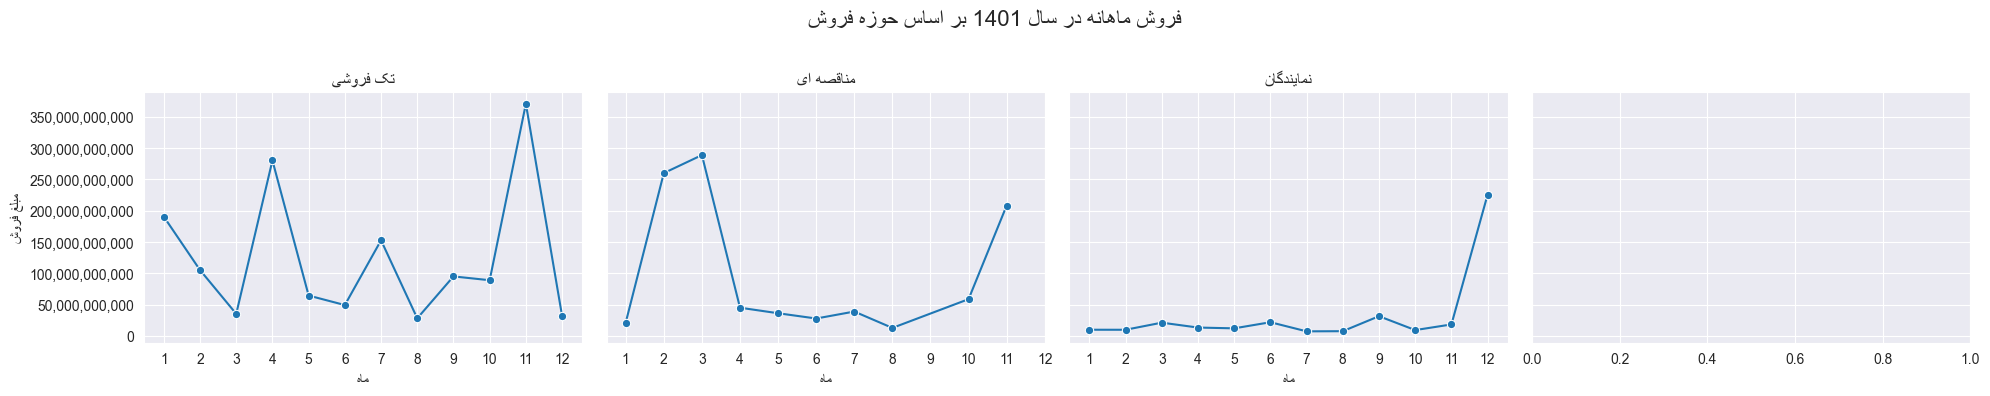

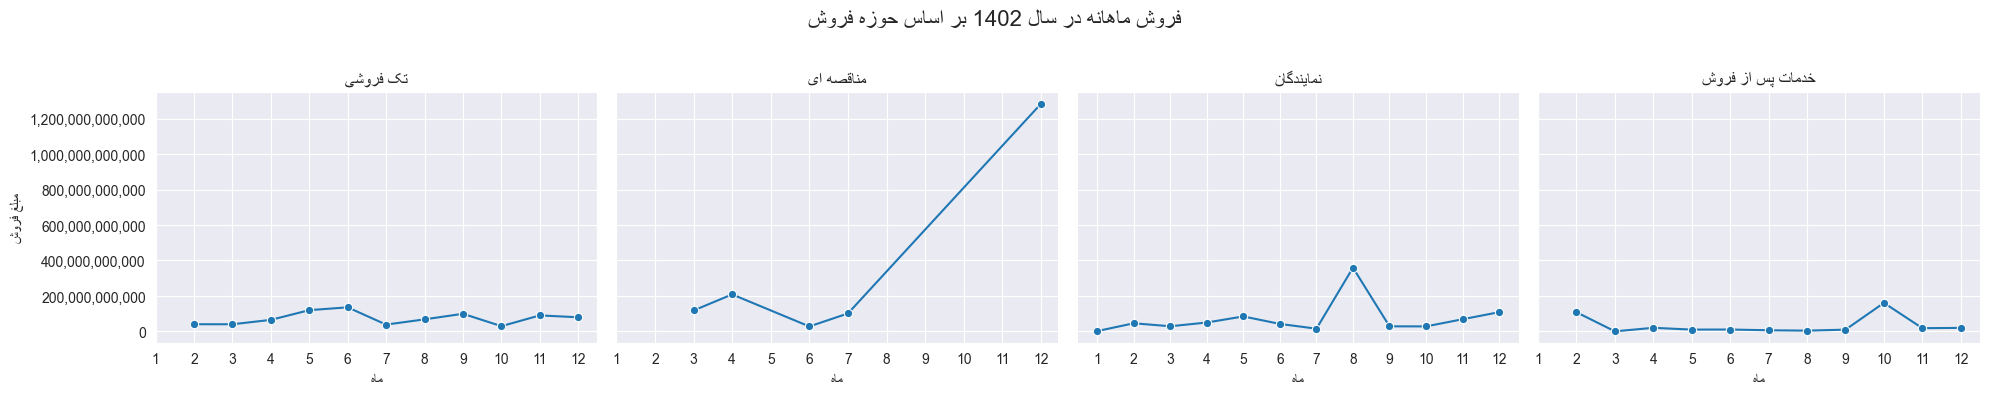

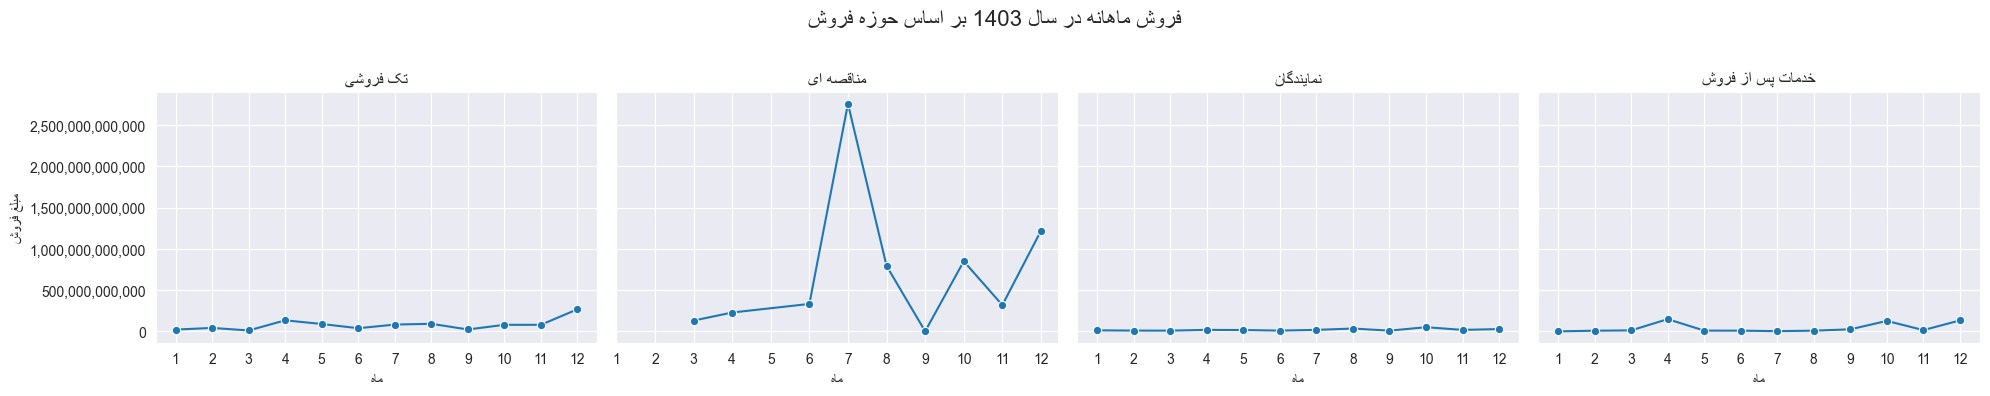

In [101]:
for year in years:
    data_year = grouped[grouped['Year'] == year]
    num_areas = len(sales_areas)
    
    fig, axes = plt.subplots(1, num_areas, figsize=(5 * num_areas, 4), sharey=True)
    fig.suptitle(reshape_fa(f'فروش ماهانه در سال {year} بر اساس حوزه فروش'), fontsize=16)

    if num_areas == 1:
        axes = [axes]

    for idx, area in enumerate(sales_areas):
        data = data_year[data_year['SalesArea'] == area]
        if data.empty:
            continue

        data = data.sort_values('Month')
        sns.lineplot(ax=axes[idx], data=data, x='Month', y='TotalSales', marker='o')
        axes[idx].set_title(reshape_fa(area), fontsize=12)
        axes[idx].set_xlabel(reshape_fa('ماه'))
        if idx == 0:
            axes[idx].set_ylabel(reshape_fa('مبلغ فروش'))
        else:
            axes[idx].set_ylabel('')
        axes[idx].set_xticks(range(1, 13))
        axes[idx].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
        axes[idx].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div style="direction: rtl; text-align: right;">
<ul>
  <li> طبق این نمودار در سال 1403 در تیرماه به علت اینکه دمای هوا بیشتر بوده و قظعی برق هم به طبع بیشتر بوده فروش نسبت به ماه های قبل افزایش داشته </li>
  <li>همچنین در سال 403 بیشترین فروش مربوط به حوزه مناقصه ای بوده است که در مهرماه اتفاق افتاده است.</li>
  <li>چون حوزه خدمات پس از فروش یکحوزه کاملا جداگانه است پس به طور دقیق نمی توان آن را با حوزه های دیگر مقایسه کرد و باید مقایسه جداگانه باشد                                                                                                                                        .</li>
  <li>در حال رشد ملایم است.علت اینکه حوزه خدمات پس از فروش درسال های 1400و1401 فروش نداشته عدم راه اندازی خدمات پس از فروش در سیستم است.</li>
  <li>سیستم فروش در انتهای سال 1400 راه اندازی شده است .</li>
  <li>طبق نمودار در انتهای سال 403 فروش افزایش چشم گیری داشته است و بیشترین مقدار فروش برای مناقصه می باشد . </li>
  <li>نمایندگان بیشتر در سال ۱۴۰۲ فعال بوده‌اند (پیک در ماه ۸).</li>
</ul>
</div>
</div>

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>بیشترین فروش در هر ماه و مشتری مربوط به آن</strong>
</div>
</div>

In [102]:
df_invoice['SalesArea'] = df_invoice['SalesArea']
grouped_Customer = df_invoice.groupby(['Month_Jalali', 'SalesArea', 'CustomerRef'])['InvoiceNetPrice'].sum().reset_index()

# پیدا کردن ایندکس بیشترین فروش برای هر (ماه، حوزه فروش)
idx = grouped_Customer.groupby(['Month_Jalali', 'SalesArea'])['InvoiceNetPrice'].idxmax()


top_customers_by_area_month = grouped_Customer.loc[idx].reset_index(drop=True)

print(top_customers_by_area_month)
# top_customers_by_area_month.to_excel('top_customers_by_area_month.xlsx', index=False)

output_path = os.path.join(output_folder, 'op_customers_by_area_month.xlsx')
top_customers_by_area_month.to_excel(output_path, index=False)


    Month_Jalali         SalesArea  CustomerRef  InvoiceNetPrice
0        1400/11          تک فروشی        13015      17404684000
1        1400/11         مناقصه ای        13832      34228725000
2        1400/11         نمایندگان            3       4643945000
3        1400/12          تک فروشی          128      28541432000
4        1400/12         مناقصه ای        18928     355720652967
..           ...               ...          ...              ...
119      1403/11         نمایندگان        20636       7664855000
120      1403/12          تک فروشی        94405     201463900001
121      1403/12  خدمات پس از فروش        13228     119625000000
122      1403/12         مناقصه ای        18806    1199863500000
123      1403/12         نمایندگان        15205       6545550000

[124 rows x 4 columns]


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">



<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه</strong>
</div>

<div style="direction: rtl; text-align: right;">
<ul>
  <li>طبق این نمودار هرسال اسفند ماه افزایش فروش داشته ایم که به علت پایان سال می باشد و میتون گفت این یک الگوی فصلی میتواند باشد .</li>
  <li> میانگین و ثبات فروش
در بیشتر ماه‌ها فروش در بازه‌ی حدود 200 تا 500 میلیارد بوده، و فقط برخی پیک‌ها از این مقدار شدیدتر بودن.</li>
  
</ul>
</div>
</div>



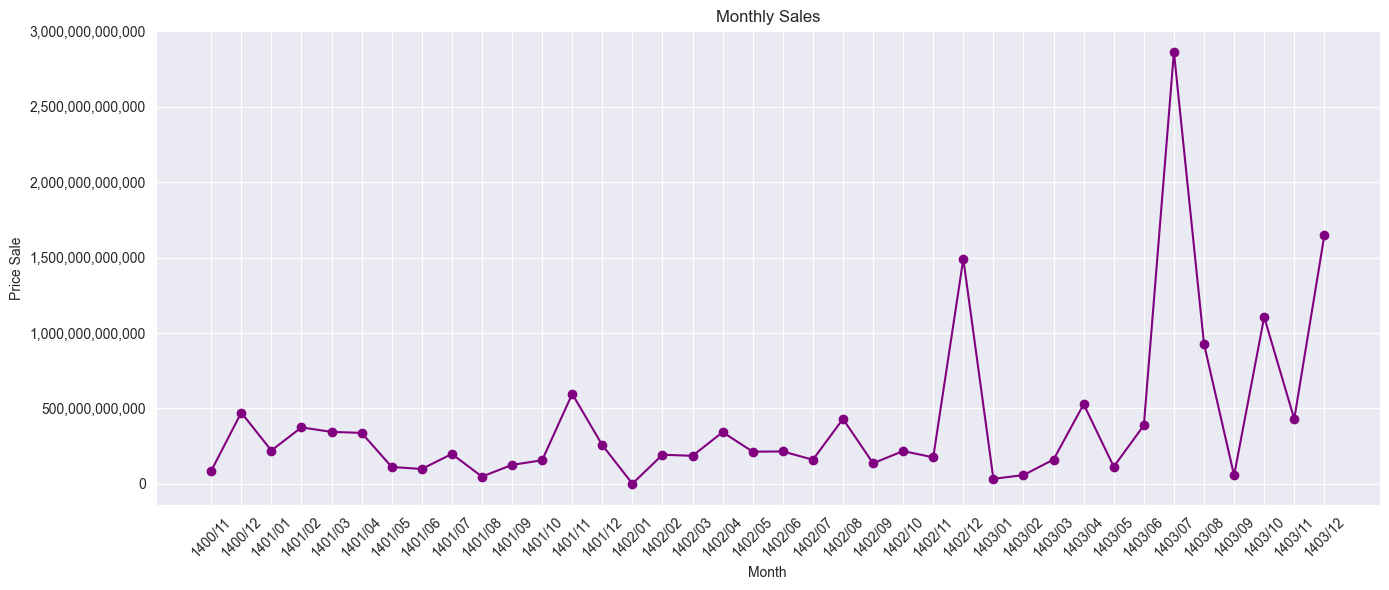

In [103]:

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Price Sale')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه</strong>
</div>
</div>


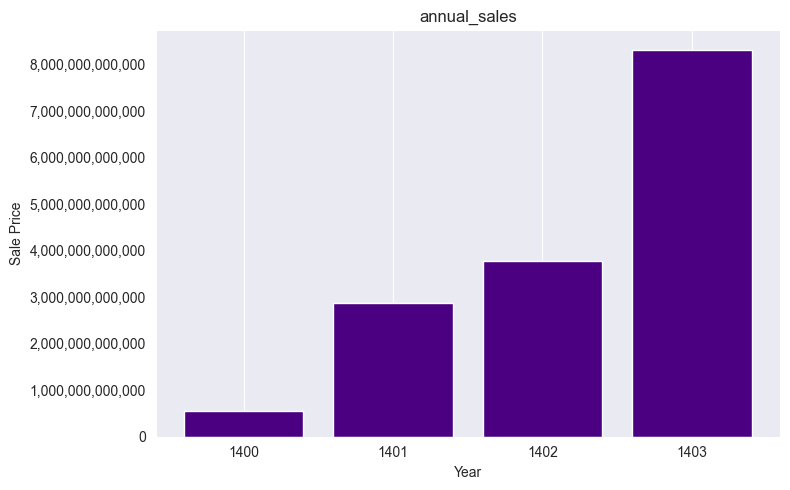

In [104]:
plt.figure(figsize=(8, 5))
plt.bar(annual_sales['Year'], annual_sales['TotalSales'], color='indigo')
plt.title('annual_sales')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong> نمودار فروش ماهانه بر اساس حوزه فروش</strong>
</div>


<div style="direction: rtl; text-align: right;">
<ul>
  <li>همونطور که مشخصه بیشترین سهم فروش برای حوزه فروش مناقصه ای می باشد</li>
 
  
</ul>
</div>
</div>


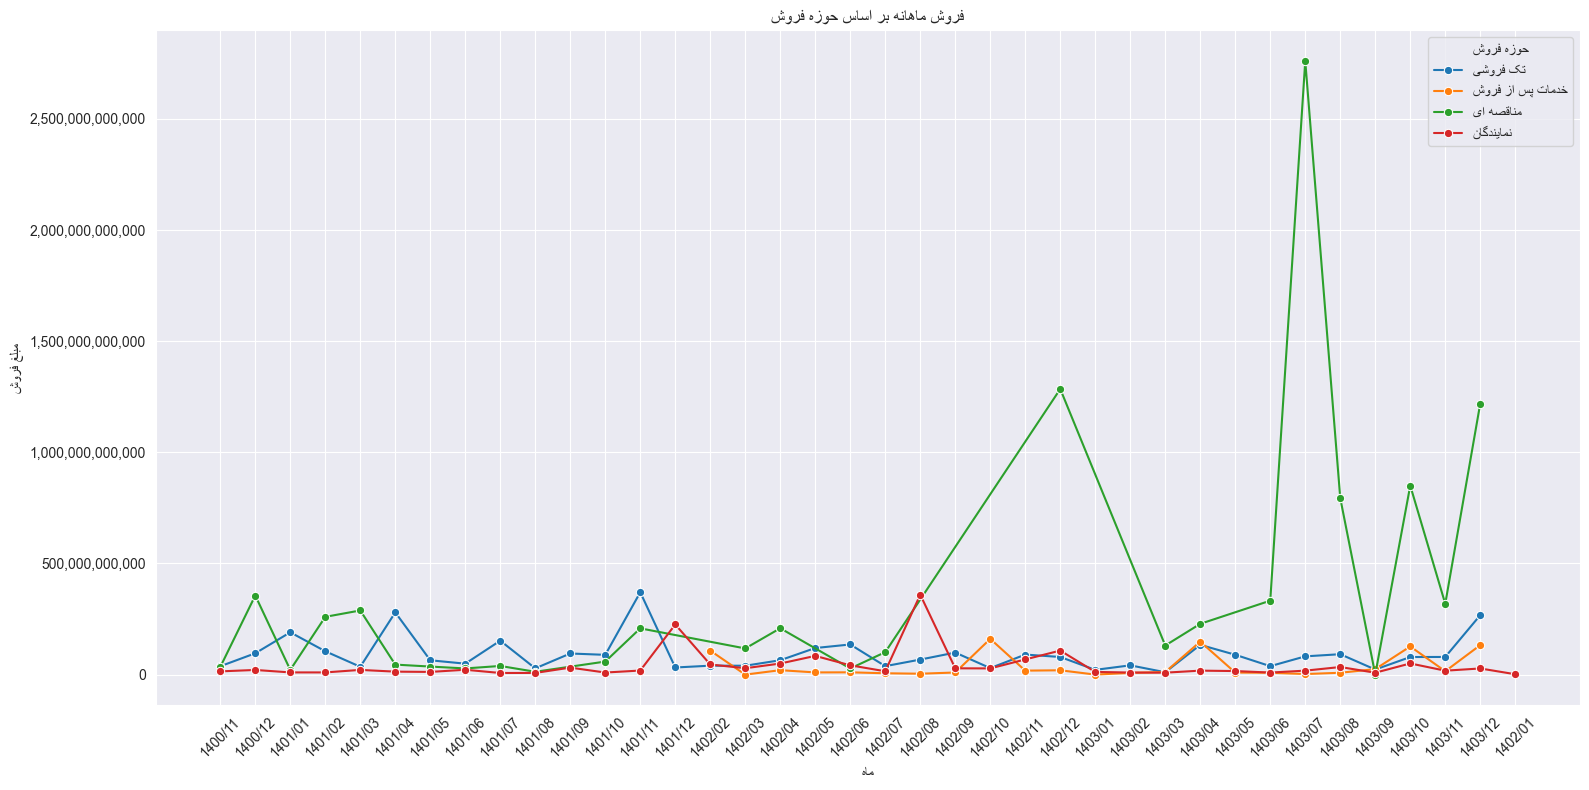

In [105]:


monthly_sales_area = df_invoice.groupby(['SalesArea', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
monthly_sales_area['SalesArea'] = monthly_sales_area['SalesArea'].apply(reshape_fa)
monthly_sales_area.columns = ['SalesArea', 'Month', 'TotalSales']
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales_area, x='Month', y='TotalSales', hue='SalesArea', marker='o')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('فروش ماهانه بر اساس حوزه فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'))
plt.tight_layout()
plt.show()






<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نودار فروش ماهانه بر اساس خدمات پس از فروش</strong>
</div>


<div style="direction: rtl; text-align: right;">
<ul>
  <li>فروش از حدود ۰ تا بیش از ۲٫۸ تریلیون ریال نوسان داره.
این می‌تونه چند دلیل داشته باشه:
تعداد مشتریان ماه‌به‌ماه بسیار متفاوته
خریدهای سازمانی/پروژه‌ای مقطعی
شاید برخی ماه‌ها فقط چند فاکتور بسیار بزرگ بوده</li>
 
  
</ul>
</div>
</div>




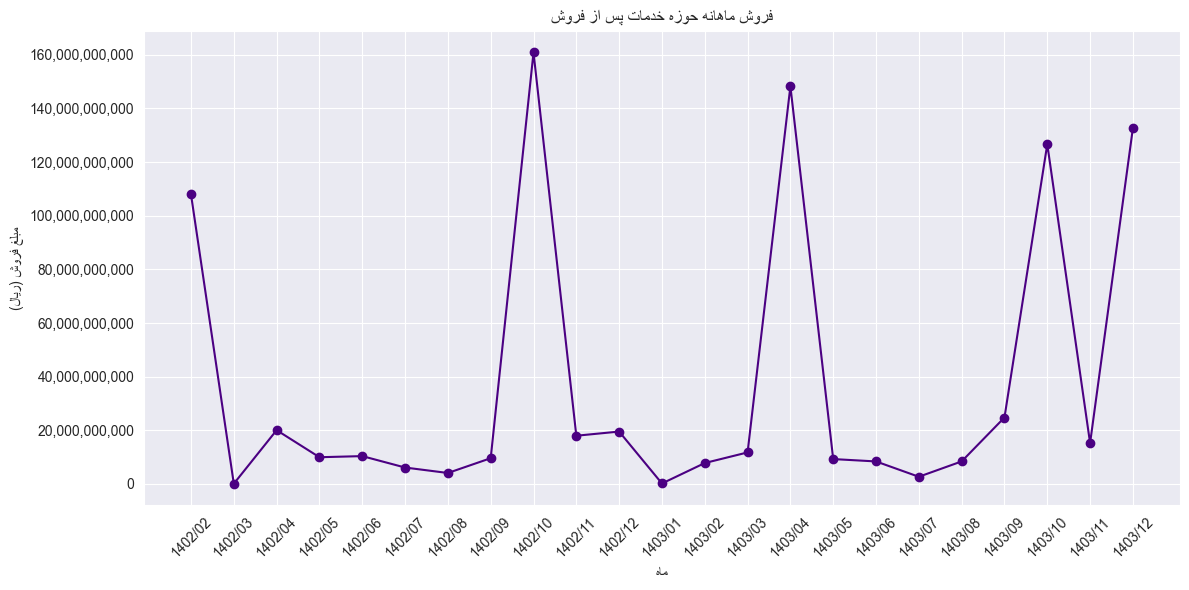

In [106]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] == reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(12,6))
plt.plot(df_service_after_sales_monthly['Month'], df_service_after_sales_monthly['TotalSales'], marker='o', color='indigo')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('فروش ماهانه حوزه خدمات پس از فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش (ریال)'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div style="direction: rtl; text-align: right;">
<ul>
  <li>انحراف معیار بالا یعنی فروش ماهانه نوسان داره</li>
</ul>
</div>
</div>


In [107]:
data = df_service_after_sales_monthly['TotalSales']

mean_val = data.mean()
median_val = data.median()
std_dev_val = data.std()
skewness_val = skew(data)
kurtosis_val = kurtosis(data)

print(f"میانگین: {mean_val:,.0f}")
print(f"میانه: {median_val:,.0f}")
print(f"انحراف معیار: {std_dev_val:,.0f}")
print(f" (skewness): {skewness_val:.2f}")
print(f" (kurtosis): {kurtosis_val:.2f}")

میانگین: 37,458,680,810
میانه: 10,335,385,450
انحراف معیار: 53,731,726,949
 (skewness): 1.42
 (kurtosis): 0.22


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه به جز خدمات پس از فروش</strong>
</div>
</div>


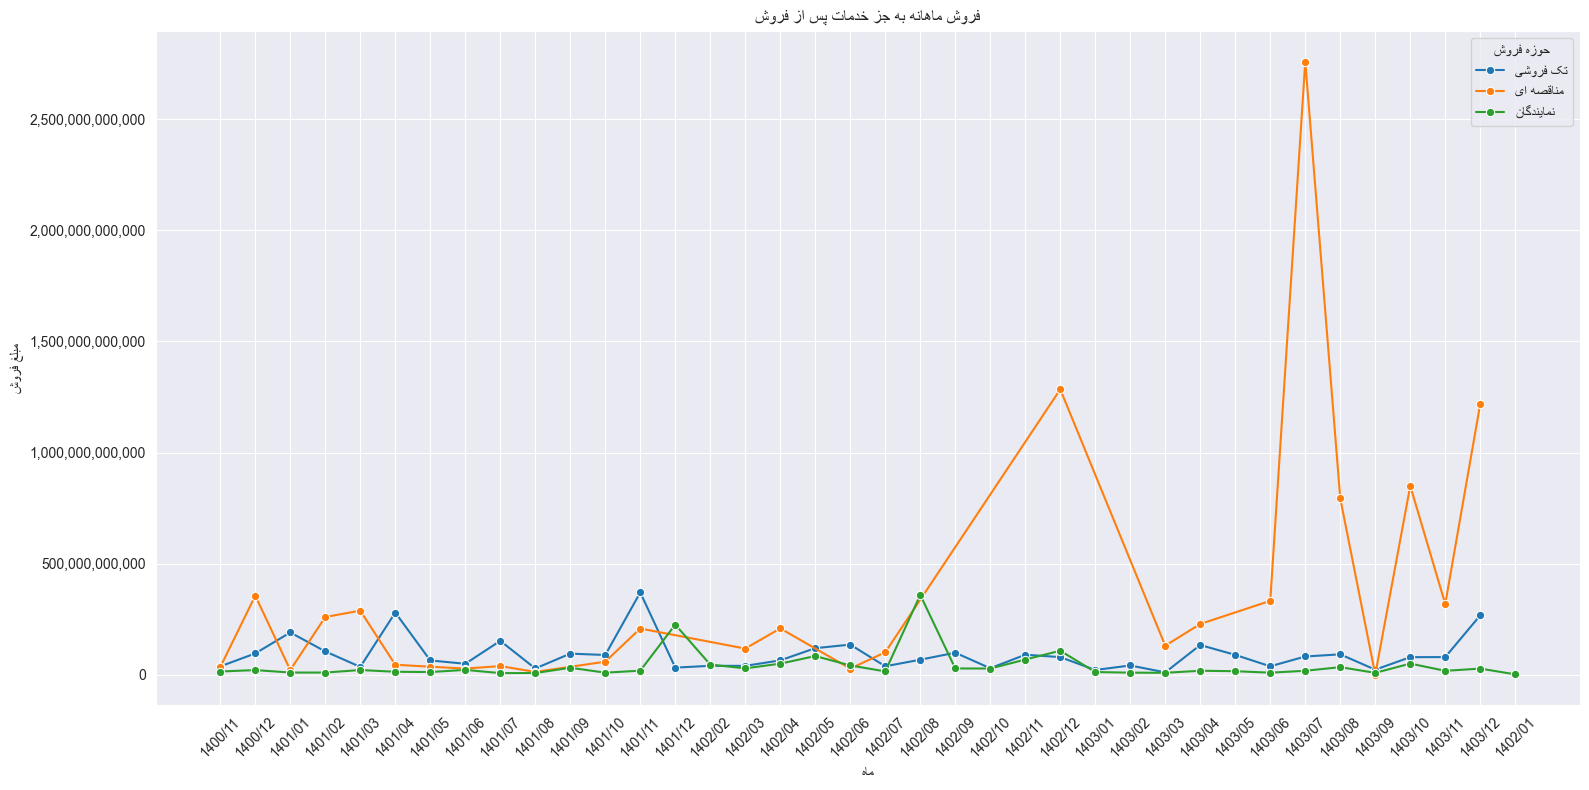

In [108]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] != reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_service_after_sales_monthly,
    x='Month',
    y='TotalSales',
    hue='SalesArea',
    marker='o'
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.title(reshape_fa('فروش ماهانه به جز خدمات پس از فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'), loc='best')
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه بر اساس حوزه فروش</strong>
</div>
</div>

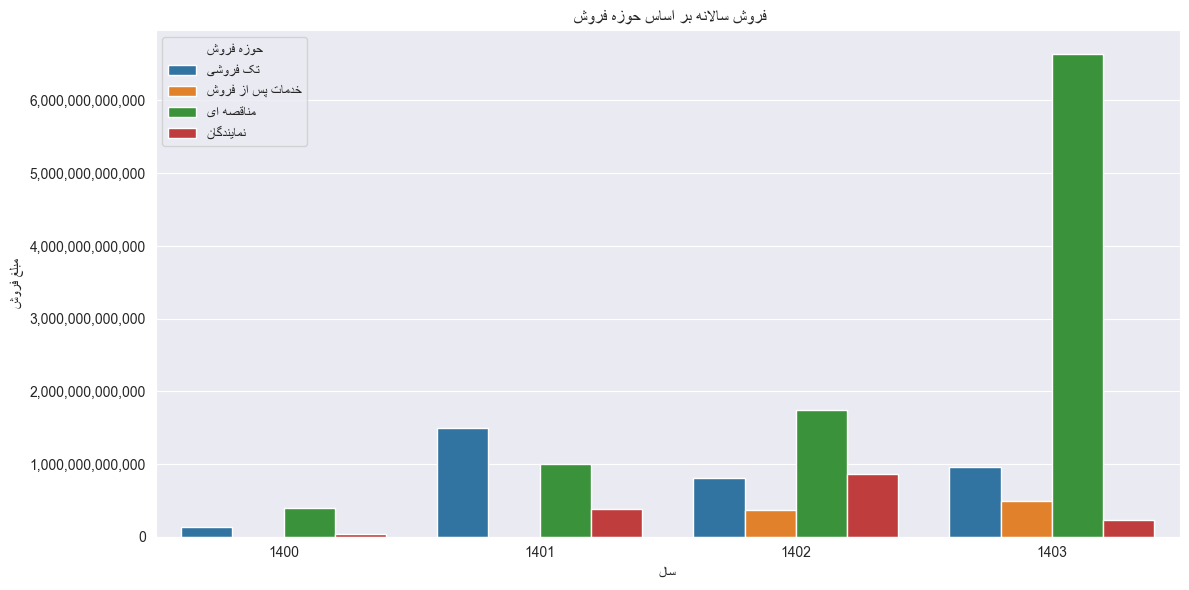

In [109]:
annual_sales_area = df_invoice.groupby(['SalesArea', 'Year_Jalali'])['InvoiceNetPrice'].sum().reset_index()
annual_sales_area['SalesArea'] = annual_sales_area['SalesArea'].apply(reshape_fa)
annual_sales_area.columns = ['SalesArea', 'Year', 'TotalSales']

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=annual_sales_area, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه بر اساس حوزه فروش '))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'), loc='best')
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه به جز خدمات پس از فروش</strong>
</div>
</div>

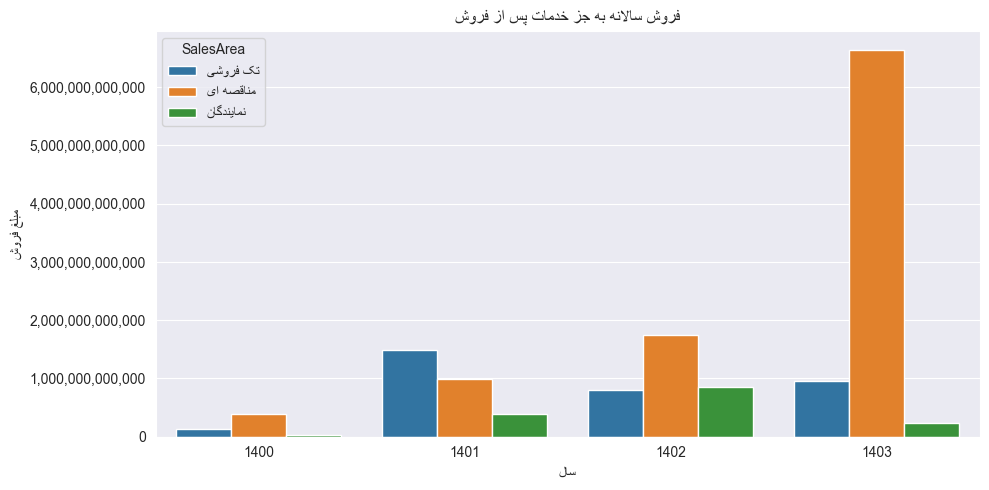

In [110]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] != reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه به جز خدمات پس از فروش'))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))

plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه خدمات پس از فروش</strong>
</div>
</div>

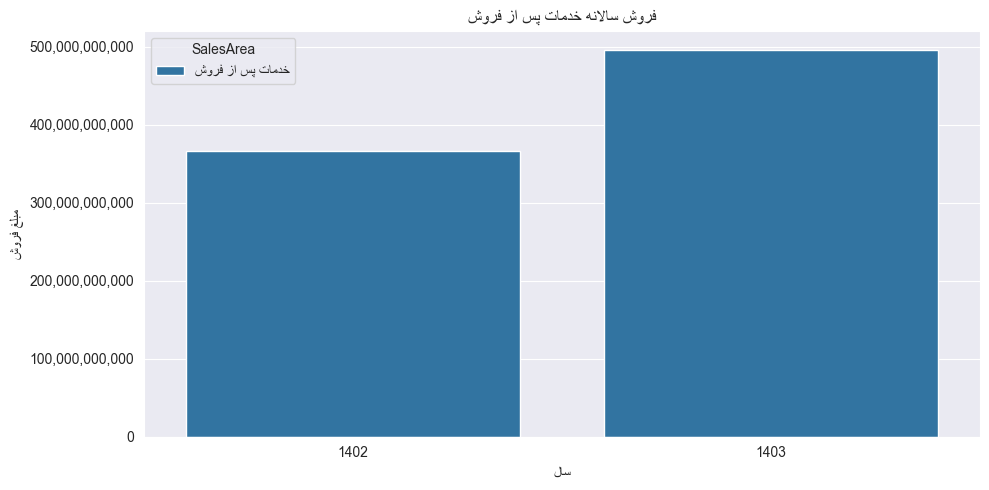

In [111]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] == reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه خدمات پس از فروش'))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))

plt.tight_layout()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>بررسی فروش هرسال با سال قبل بر اساس حوزه فروش</strong>
</div><div style="direction: rtl; text-align: right;">
<ul> 
  <li>نمایندگان : در بسیاری از ماه‌ها رشد چشمگیر داشته (مثلاً 593٪، 290٪، 425٪)
این نشون می‌ده که یا بازار تازه‌ای در اون منطقه شکل گرفته یا فعالیت‌های بازاریابی موفق بوده.
 اقدام پیشنهادی: سرمایه‌گذاری بیشتر در این مناطق، حفظ روند فعلی</li>
  <li> شناسایی مناطق با افت شدید
مثلاً:
تک فروشی در چند ماه افت شدید داشته مثل -76٪، -75٪، -73٪ /
این ممکنه به دلایل مختلف باشه: اشباع بازار، از دست دادن قراردادهای بزرگ، رقبا /
 اقدام پیشنهادی: بررسی علل افت – آیا رقبا فعال‌تر شدند؟ آیا محصولات افت کیفیت داشته‌اند؟</li>
  <li>نوسانات بسیار بالا در درصد رشد برای مثال:
برخی ماه‌ها رشدهای خیلی شدید داریم: 1103٪، 2631٪، 4626٪ /
این نوسانات زیاد ممکنه نشون بده که در سال پایه (سال قبل) فروش خیلی پایین بوده/
اقدام پیشنهادی: ,بررسی این نقاط – اگر دلیل رشد جهشی فروش کم قبلی بوده، باید با احتیاط تفسیر بشه
</li>

</li>
</ul>
</div>
</div>

In [112]:

df_sales_growth = df_service_after_sales_monthly.copy()
df_sales_growth['TotalSales_Clean'] = df_sales_growth['TotalSales']
df_sales_growth[['Year', 'MonthNum']] = df_sales_growth['Month'].str.split('/', expand=True).astype(int)


df_sales_growth = df_sales_growth[df_sales_growth['Year'] >= 1401].copy()


df_this_year = df_sales_growth.copy()
df_last_year = df_sales_growth.copy()

df_last_year['Year'] += 1 
df_last_year = df_last_year.rename(columns={'TotalSales_Clean': 'LastYearSale'})


df_merged = pd.merge(
    df_this_year,
    df_last_year[['SalesArea', 'Year', 'MonthNum', 'LastYearSale']],
    on=['SalesArea', 'Year', 'MonthNum'],
    how='left'
)


df_merged['GrowPercentYoY'] = (
    (df_merged['TotalSales_Clean'] - df_merged['LastYearSale']) / df_merged['LastYearSale']
) * 100


df_merged['GrowPercentYoY'] = df_merged['GrowPercentYoY'].round(2)


df_merged['Month'] = df_merged['Year'].astype(str) + '/' + df_merged['MonthNum'].astype(str).str.zfill(2)
output_path = os.path.join(output_folder, 'YoY_Growth_Service_Sales.xlsx')


df_merged[['Month', 'TotalSales', 'LastYearSale', 'GrowPercentYoY', 'SalesArea']] \
    .sort_values(by=['Month', 'SalesArea']) \
    .to_excel(output_path, index=False)


print(df_merged)

    SalesArea    Month    TotalSales  TotalSales_Clean  Year  MonthNum  \
0    ﯽﺷﻭﺮﻓ ﮏﺗ  1401/01  190277964098      190277964098  1401         1   
1    ﯽﺷﻭﺮﻓ ﮏﺗ  1401/02  105079468685      105079468685  1401         2   
2    ﯽﺷﻭﺮﻓ ﮏﺗ  1401/03   35293110000       35293110000  1401         3   
3    ﯽﺷﻭﺮﻓ ﮏﺗ  1401/04  279907727200      279907727200  1401         4   
4    ﯽﺷﻭﺮﻓ ﮏﺗ  1401/05   64439404800       64439404800  1401         5   
..        ...      ...           ...               ...   ...       ...   
90  ﻥﺎﮔﺪﻨﯾﺎﻤﻧ  1403/08   34163800000       34163800000  1403         8   
91  ﻥﺎﮔﺪﻨﯾﺎﻤﻧ  1403/09    8533800000        8533800000  1403         9   
92  ﻥﺎﮔﺪﻨﯾﺎﻤﻧ  1403/10   50254930000       50254930000  1403        10   
93  ﻥﺎﮔﺪﻨﯾﺎﻤﻧ  1403/11   17657035000       17657035000  1403        11   
94  ﻥﺎﮔﺪﻨﯾﺎﻤﻧ  1403/12   27676495000       27676495000  1403        12   

    LastYearSale  GrowPercentYoY  
0            NaN             NaN  
1            NaN             NaN  
2     

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>میانگین خرید هر مشتری</strong>
</div>
</div>

In [113]:
avg_payment_per_customer = df_invoice.groupby('CustomerRef')['InvoiceNetPrice'].mean().reset_index()
avg_payment_per_customer.columns = ['CustomerRef', 'AverageInvoiceNetPrice']
print( avg_payment_per_customer.loc[avg_payment_per_customer['AverageInvoiceNetPrice'].idxmax()])


output_path = os.path.join(output_folder, 'avg_payment_per_customer.xlsx')
avg_payment_per_customer.to_excel(output_path, index=False)



CustomerRef               1.790900e+04
AverageInvoiceNetPrice    2.952532e+11
Name: 241, dtype: float64


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>تعیین درصد مشتریان وفادار</strong>
</div>
</div>

     CustomerRef  InvoiceCount
0              3            23
1              4             1
2              5             1
3              6             1
4             21             1
..           ...           ...
761        94393             1
762        94399             1
763        94405             2
764        94407             1
765        94414             1

[766 rows x 2 columns]
تعداد کل مشتریان: 766
تعداد مشتریان وفادار: 365 (47.65%)
تعداد مشتریان جدید: 401 (52.35%)


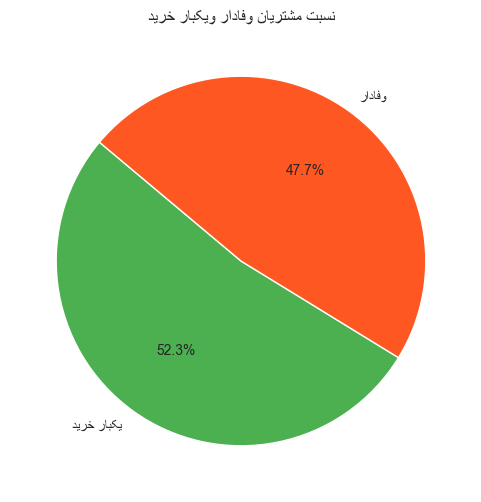

In [114]:
#  تعداد فاکتورهای هر مشتری
customer_purchase_counts = df_invoice.groupby('CustomerRef').size().reset_index(name='InvoiceCount')
print(customer_purchase_counts)

#  تعیین نوع مشتری بر اساس تعداد فاکتور
customer_purchase_counts['CustomerType'] = customer_purchase_counts['InvoiceCount'].apply(
lambda x: 'وفادار' if x > 1 else 'یکبار خرید'
)

#  تعداد مشتریان کل، وفادار و جدید
total_customers = customer_purchase_counts.shape[0]
loyal_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == 'وفادار'].shape[0]
new_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == 'یکبار خرید'].shape[0]
customer_purchase_counts['CustomerType'] = customer_purchase_counts['CustomerType'].apply(reshape_fa)

percent_loyal = (loyal_customers / total_customers) * 100
percent_new = (new_customers / total_customers) * 100

print(f"تعداد کل مشتریان: {total_customers}")
print(f"تعداد مشتریان وفادار: {loyal_customers} ({percent_loyal:.2f}%)")
print(f"تعداد مشتریان جدید: {new_customers} ({percent_new:.2f}%)")

counts = customer_purchase_counts['CustomerType'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'], startangle=140)
plt.title(reshape_fa('نسبت مشتریان وفادار ویکبار خرید'))
plt.show()



In [115]:
loyal_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('وفادار')]['CustomerRef']
new_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('یکبار خرید')]['CustomerRef']

print("لیست نمونه مشتریان وفادار:")
print(loyal_customers_list.head())

print("\nلیست نمونه مشتریان یکبار خرید:")
print(new_customers_list.head())

# 
# with pd.ExcelWriter('customers_loyal_and_new.xlsx') as writer:
#     loyal_customers_list.to_excel(writer, sheet_name='مشتریان وفادار', index=False)
#     new_customers_list.to_excel(writer, sheet_name='مشتریان با یکبار خرید', index=False)

output_path = os.path.join(output_folder, 'customers_loyal_and_new.xlsx')
with pd.ExcelWriter(output_path) as writer:
    loyal_customers_list.to_excel(writer, sheet_name='مشتریان وفادار', index=False)
    new_customers_list.to_excel(writer, sheet_name='مشتریان با یکبار خرید', index=False)



لیست نمونه مشتریان وفادار:
0       3
8     128
9     149
10    152
12    225
Name: CustomerRef, dtype: uint32

لیست نمونه مشتریان یکبار خرید:
1     4
2     5
3     6
4    21
5    82
Name: CustomerRef, dtype: uint32



 حوزه: تک فروشی
MSE: 1,449,335,700,641,269,940,224
R²: 0.672


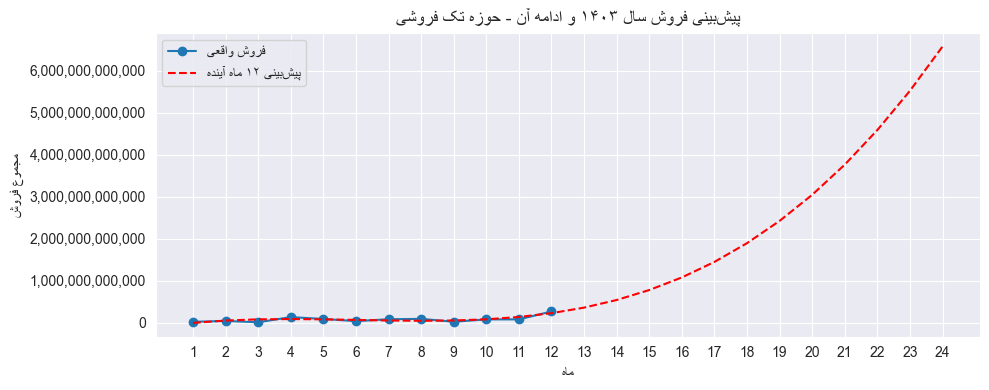


 حوزه: خدمات پس از فروش
MSE: 2,070,768,750,938,301,399,040
R²: 0.317


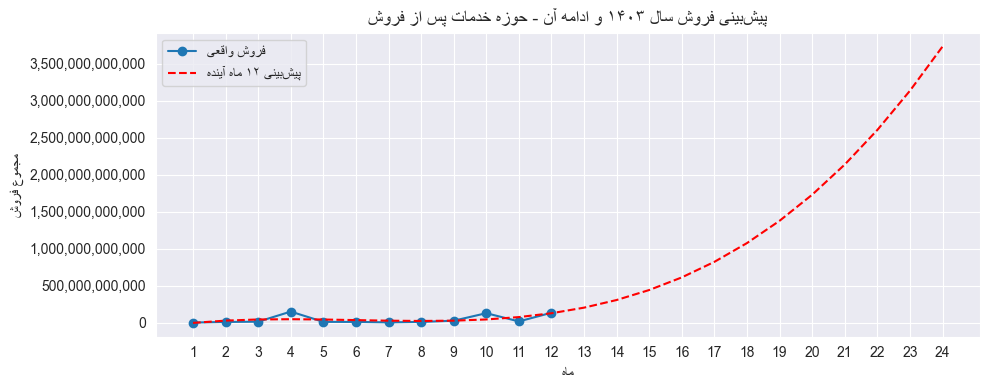


 حوزه: مناقصه ای
MSE: 498,024,635,288,435,826,884,608
R²: 0.233


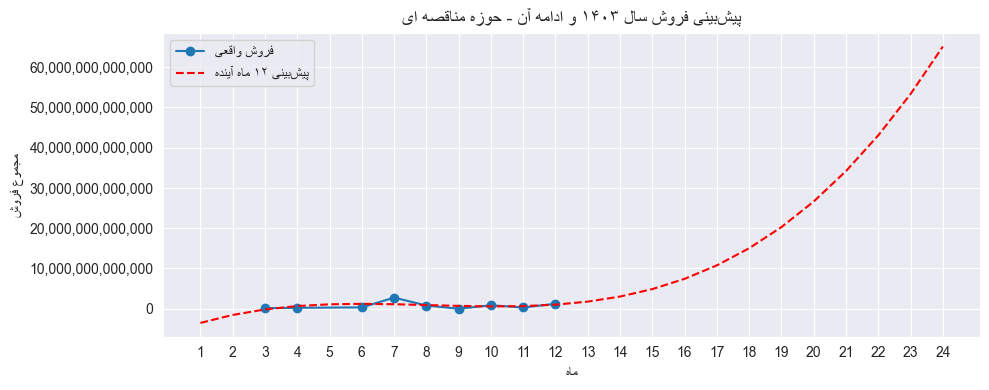


 حوزه: نمایندگان
MSE: 95,881,889,257,018,114,048
R²: 0.340


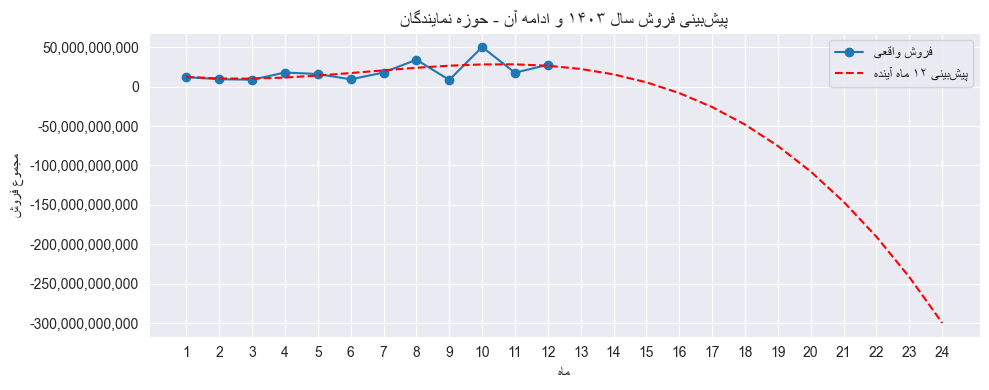

In [116]:


# فیلتر فقط داده‌های سال ۱۴۰۳
data_1403 = grouped[grouped['Year'] == '1403']

# لیست حوزه‌های فروش
sales_areas = data_1403['SalesArea'].unique()

for area in sales_areas:
    data_area = data_1403[data_1403['SalesArea'] == area]
    
    x = data_area['Month'].values
    y = data_area['TotalSales'].values

    # مدل رگرسیون چندجمله‌ای درجه 3
    degree = 3
    model = np.poly1d(np.polyfit(x, y, degree))

    # پیش‌بینی روی داده‌های موجود و 12 ماه آینده
    x_future = np.arange(1, 25)  # ماه‌های 1 تا 24
    y_future_pred = model(x_future)

  
    y_pred_train = model(x)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'o-', label=reshape_fa('فروش واقعی'))
    plt.plot(x_future, y_future_pred, 'r--', label=reshape_fa('پیش‌بینی ۱۲ ماه آینده'))

    plt.title(reshape_fa(f'پیش‌بینی فروش سال ۱۴۰۳ و ادامه آن - حوزه {area}'), fontsize=13)
    plt.xlabel(reshape_fa('ماه'))
    plt.ylabel(reshape_fa('مجموع فروش'))
    plt.xticks(ticks=np.arange(1, 25, 1))
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    

    print(f'\n حوزه: {area}')
    print(f'MSE: {mse:,.0f}')
    print(f'R²: {r2:.3f}')
    
    plt.tight_layout()
    plt.show()



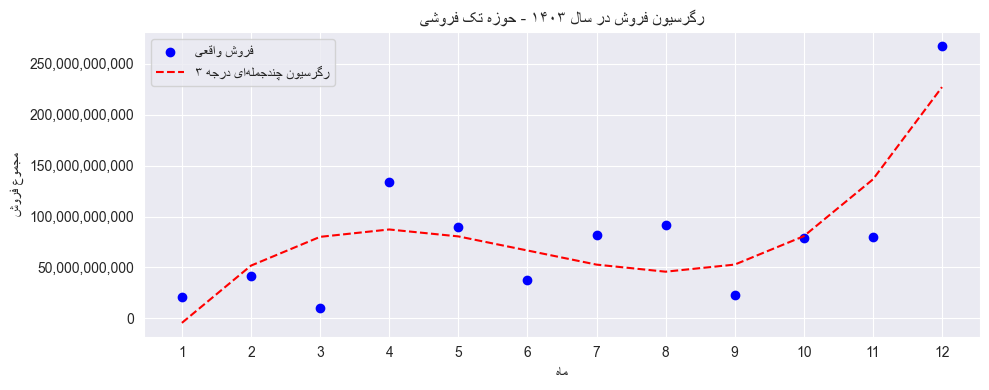

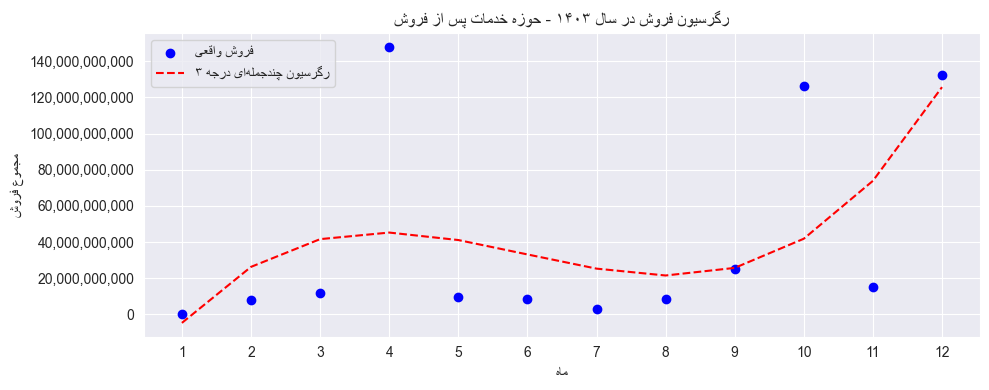

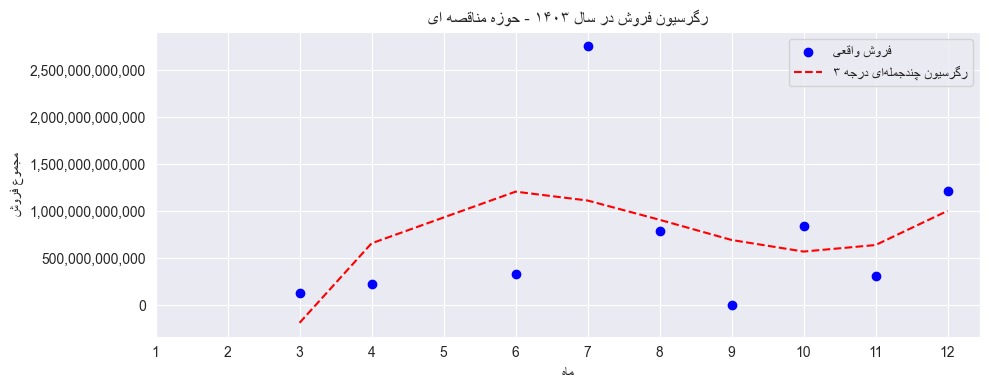

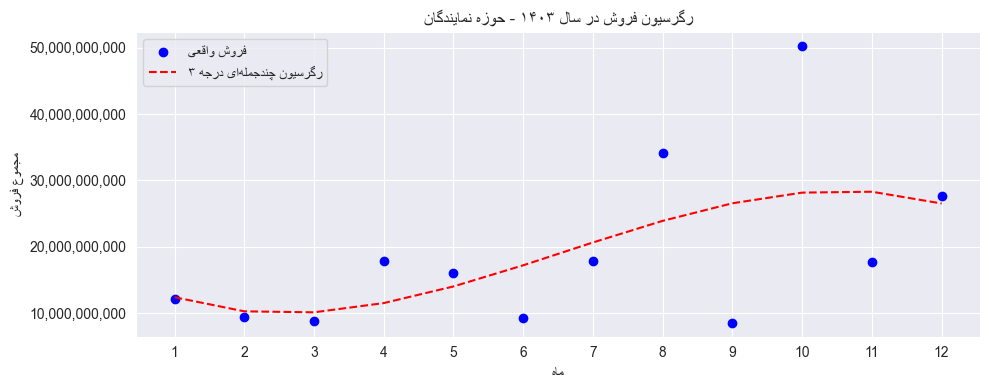

In [117]:
data_1403 = grouped[grouped['Year'] == '1403']  
sales_areas = data_1403['SalesArea'].unique()

# حلقه برای هر حوزه فروش
for area in sales_areas:
    area_data = data_1403[data_1403['SalesArea'] == area]
    
    if len(area_data) < 2:
        continue  # اگر داده کافی نداشت، از این حوزه عبور کن

    x = area_data['Month']
    y = area_data['TotalSales']

    # مدل رگرسیون چندجمله‌ای درجه 3
    model = np.poly1d(np.polyfit(x, y, 3))
    y_pred = model(x)

    # رسم نمودار
    plt.figure(figsize=(10, 4))
    plt.scatter(x, y, label=reshape_fa('فروش واقعی'), color='blue') 
    plt.plot(x, y_pred, 'r--', label=reshape_fa('رگرسیون چندجمله‌ای درجه ۳'))  

    plt.xticks(range(1, 13))
    plt.xlabel(reshape_fa('ماه'))
    plt.ylabel(reshape_fa('مجموع فروش'))
    plt.title(reshape_fa(f'رگرسیون فروش در سال ۱۴۰۳ - حوزه {area}'))

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>گروهبندی بیشترین فروش برای شهرهای مختلف</strong>
</div>
</div>

In [118]:
def get_city_sales_rank(df_invoice, year=None):
    if year:
        df_invoice = df_invoice[df_invoice['Year_Jalali'] == str(year)]

    result = df_invoice.groupby('RegionalDivision')['InvoiceNetPrice'].sum() \
               .sort_values(ascending=False).reset_index()
    
    result['RegionalDivision'] = result['RegionalDivision']
    result.columns = ['RegionalDivisionNumber', 'TotalSales']
    return result

# همه سال‌ها
city_sales_rank = get_city_sales_rank(df_invoice)
print(city_sales_rank)

print('*' * 50)

year = 1403
city_sales_rank_year = get_city_sales_rank(df_invoice, year)
print(city_sales_rank_year)





   RegionalDivisionNumber     TotalSales
0                   تهران  9632171938259
1             استان تهران  3876529764736
2                  اصفهان   847770321650
3                   بومهن   245250000000
4                   شیراز   116426834000
..                    ...            ...
84                 جاجرود       16350000
85           مرکزی اصفهان       13080000
86                 ماهدشت        7630000
87             گنبد کاووس        7085000
88                 دلیجان        5500000

[89 rows x 2 columns]
**************************************************
   RegionalDivisionNumber     TotalSales
0                   تهران  4416804714283
1             استان تهران  3583348126536
2                  اصفهان    57370266800
3                   شیراز    35347620000
4                     یزد    34496110000
5                   کرمان    29762700000
6                    مشهد    19637970000
7                     کرج    18974120000
8                  اردبیل    18710577600
9                   سمنا

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>بیشترین فروش در هر شهر برای کدام مشتری است؟</strong>
</div>
</div>

In [119]:
top_customers = df_invoice.groupby(['RegionalDivision', 'CustomerRef'])['InvoiceNetPrice'].sum().reset_index()

top_customers = top_customers.sort_values(['RegionalDivision', 'InvoiceNetPrice'], ascending=[False, False])

# گرفتن مشتری اول در هر شهر
top_in_each_city = top_customers.groupby('RegionalDivision').first().reset_index()
top_in_each_city.columns = ['منطقه', 'کد مشتری', 'مجموع فروش']

print(top_in_each_city)


output_path = os.path.join(output_folder, 'max_sales_city_customer.xlsx')
top_in_each_city.to_excel(output_path, index=False)


         منطقه  کد مشتری   مجموع فروش
0        آباده     23322     59950000
1          آمل     93730     23980000
2         اراک     22075   3175510000
3       اردبیل     18866  30549765600
4       ارومیه       149   6538460000
..         ...       ...          ...
84    کرمانشاه     93708    344800000
85       گرگان     94324    275000000
86  گنبد کاووس     93637      7085000
87       یاسوج     20397  16573550000
88         یزد     15602  31866040000

[89 rows x 3 columns]


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>میانگین فروش فاکتور در هر منطقه</strong>
</div><div style="direction: rtl; text-align: right;">
<ul> اگر در شهری میانگین فاکتور بالاست، یعنی مشتری‌ها:
  <li>یا محصولات گران‌تری می‌خرن خریدهای بزرگ‌تری انجام می‌دن</li>
  <li>یا ممکنه تعداد کالا در هر سفارش زیاد باشه</li>
  <li>برعکس، میانگین فاکتور پایین = خریدهای کوچیک‌تر، خرده‌فروشی، یا مشتری کم‌مصرف.
</li>
  <li>تشخیص مناطق با پتانسیل بالا برای فروش B2B (عمده‌فروشی)</li>
  <li> تشخیص نیاز به سیاست قیمت‌گذاری متفاوت : اگر در منطقه‌ای فاکتور میانگین خیلی پایینه،
ممکنه لازم باشه سبد محصول یا استراتژی فروش اونجا تغییر کنه
شاید نیاز به تبلیغات یا پروموشن‌های خاص باشه

</li>
</ul>
</div>
</div>

In [120]:
avg_invoice_per_region = df_invoice.groupby('RegionalDivision')['InvoiceNetPrice'].mean().reset_index()
avg_invoice_per_region.columns = ['شهر', 'میانگین مبلغ فاکتور']
avg_invoice_per_region = avg_invoice_per_region.sort_values('میانگین مبلغ فاکتور', ascending=False)
print(avg_invoice_per_region)

output_path = os.path.join(output_folder, 'avg_invoice_per_region.xlsx')
avg_invoice_per_region.to_excel(output_path, index=False)



             شهر  میانگین مبلغ فاکتور
25         بومهن         2.452500e+11
7    استان تهران         8.427239e+10
11        اصفهان         4.844402e+09
28         تهران         4.549916e+09
20    بندر انزلی         4.283700e+09
..           ...                  ...
29        جاجرود         1.635000e+07
67  مرکزی اصفهان         1.308000e+07
63        ماهدشت         7.630000e+06
86    گنبد کاووس         7.085000e+06
34        دلیجان         5.500000e+06

[89 rows x 2 columns]


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>تعداد فاکتور در هر منطقه</strong>
  </div>
  </div>

In [121]:
invoice_count_by_region = df_invoice.groupby('RegionalDivision')['InvoiceID'].nunique().reset_index()
invoice_count_by_region.columns = ['منطقه', 'تعداد فاکتور']
invoice_count_by_region = invoice_count_by_region.sort_values('تعداد فاکتور', ascending=False)

print(invoice_count_by_region.head())

output_path = os.path.join(output_folder, 'invoice_count_by_region.xlsx')
invoice_count_by_region.to_excel(output_path, index=False)


     منطقه  تعداد فاکتور
28   تهران          2117
11  اصفهان           175
83   کرمان           148
88     یزد            86
73    مشهد            86


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>مقایسه تعداد فاکتورها با درک رفتار مشتری </strong>
  </div>
  </div>

In [122]:
region_summary = df_invoice.groupby('RegionalDivision').agg(
    total_sales=('InvoiceNetPrice', 'sum'),
    invoice_count=('InvoiceNetPrice', 'count'),
    avg_invoice=('InvoiceNetPrice', 'mean')
).reset_index()

region_summary.columns = ['شهر', 'مجموع فروش', 'تعداد فاکتور', 'میانگین فاکتور']
region_summary = region_summary.sort_values('مجموع فروش', ascending=False)

print(region_summary)

output_path = os.path.join(output_folder, 'region_summary.xlsx')
region_summary.to_excel(output_path, index=False)

             شهر     مجموع فروش  تعداد فاکتور  میانگین فاکتور
28         تهران  9632171938259          2117    4.549916e+09
7    استان تهران  3876529764736            46    8.427239e+10
11        اصفهان   847770321650           175    4.844402e+09
25         بومهن   245250000000             1    2.452500e+11
53         شیراز   116426834000            72    1.617039e+09
..           ...            ...           ...             ...
29        جاجرود       16350000             1    1.635000e+07
67  مرکزی اصفهان       13080000             1    1.308000e+07
63        ماهدشت        7630000             1    7.630000e+06
86    گنبد کاووس        7085000             1    7.085000e+06
34        دلیجان        5500000             1    5.500000e+06

[89 rows x 4 columns]


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>مقایسه تعداد فاکتورها با درک رفتار مشتری با نمودار heatmap</strong>
</div><div style="direction: rtl; text-align: right;">
<ul> 
  <li>۱. تهران:
مقدار بسیار بالای نرمال‌شده در ستون‌های مجموع فروش و تعداد فاکتور داره.

یعنی هم فروش بسیار بالا داشته، هم تعداد فاکتور زیاد بوده.

در عوض، میانگین فاکتور خیلی معمولیه → نشون می‌ده فروش تهران پراکنده‌ست و بیشتر بر اساس تعداد زیاد تراکنش‌ها بوده.</li>

  <li>۲. بومین:
میانگین فاکتورش بسیار بالاست (رنگ قرمز در اون ستون).

اما مجموع فروش و تعداد فاکتور بالا نیستن.

یعنی احتمالاً مشتری‌های کم ولی با خریدهای سنگین داشته.</li>


  <li> ۳. اکثر شهرها (مثل کاشان، قم، ...):
اعدادشون نزدیک به صفر یا منفی کمی هستن.

یعنی رفتار فروش‌شون خیلی متوسط یا زیر میانگین بوده.
</li>
</ul>
</div>
</div>

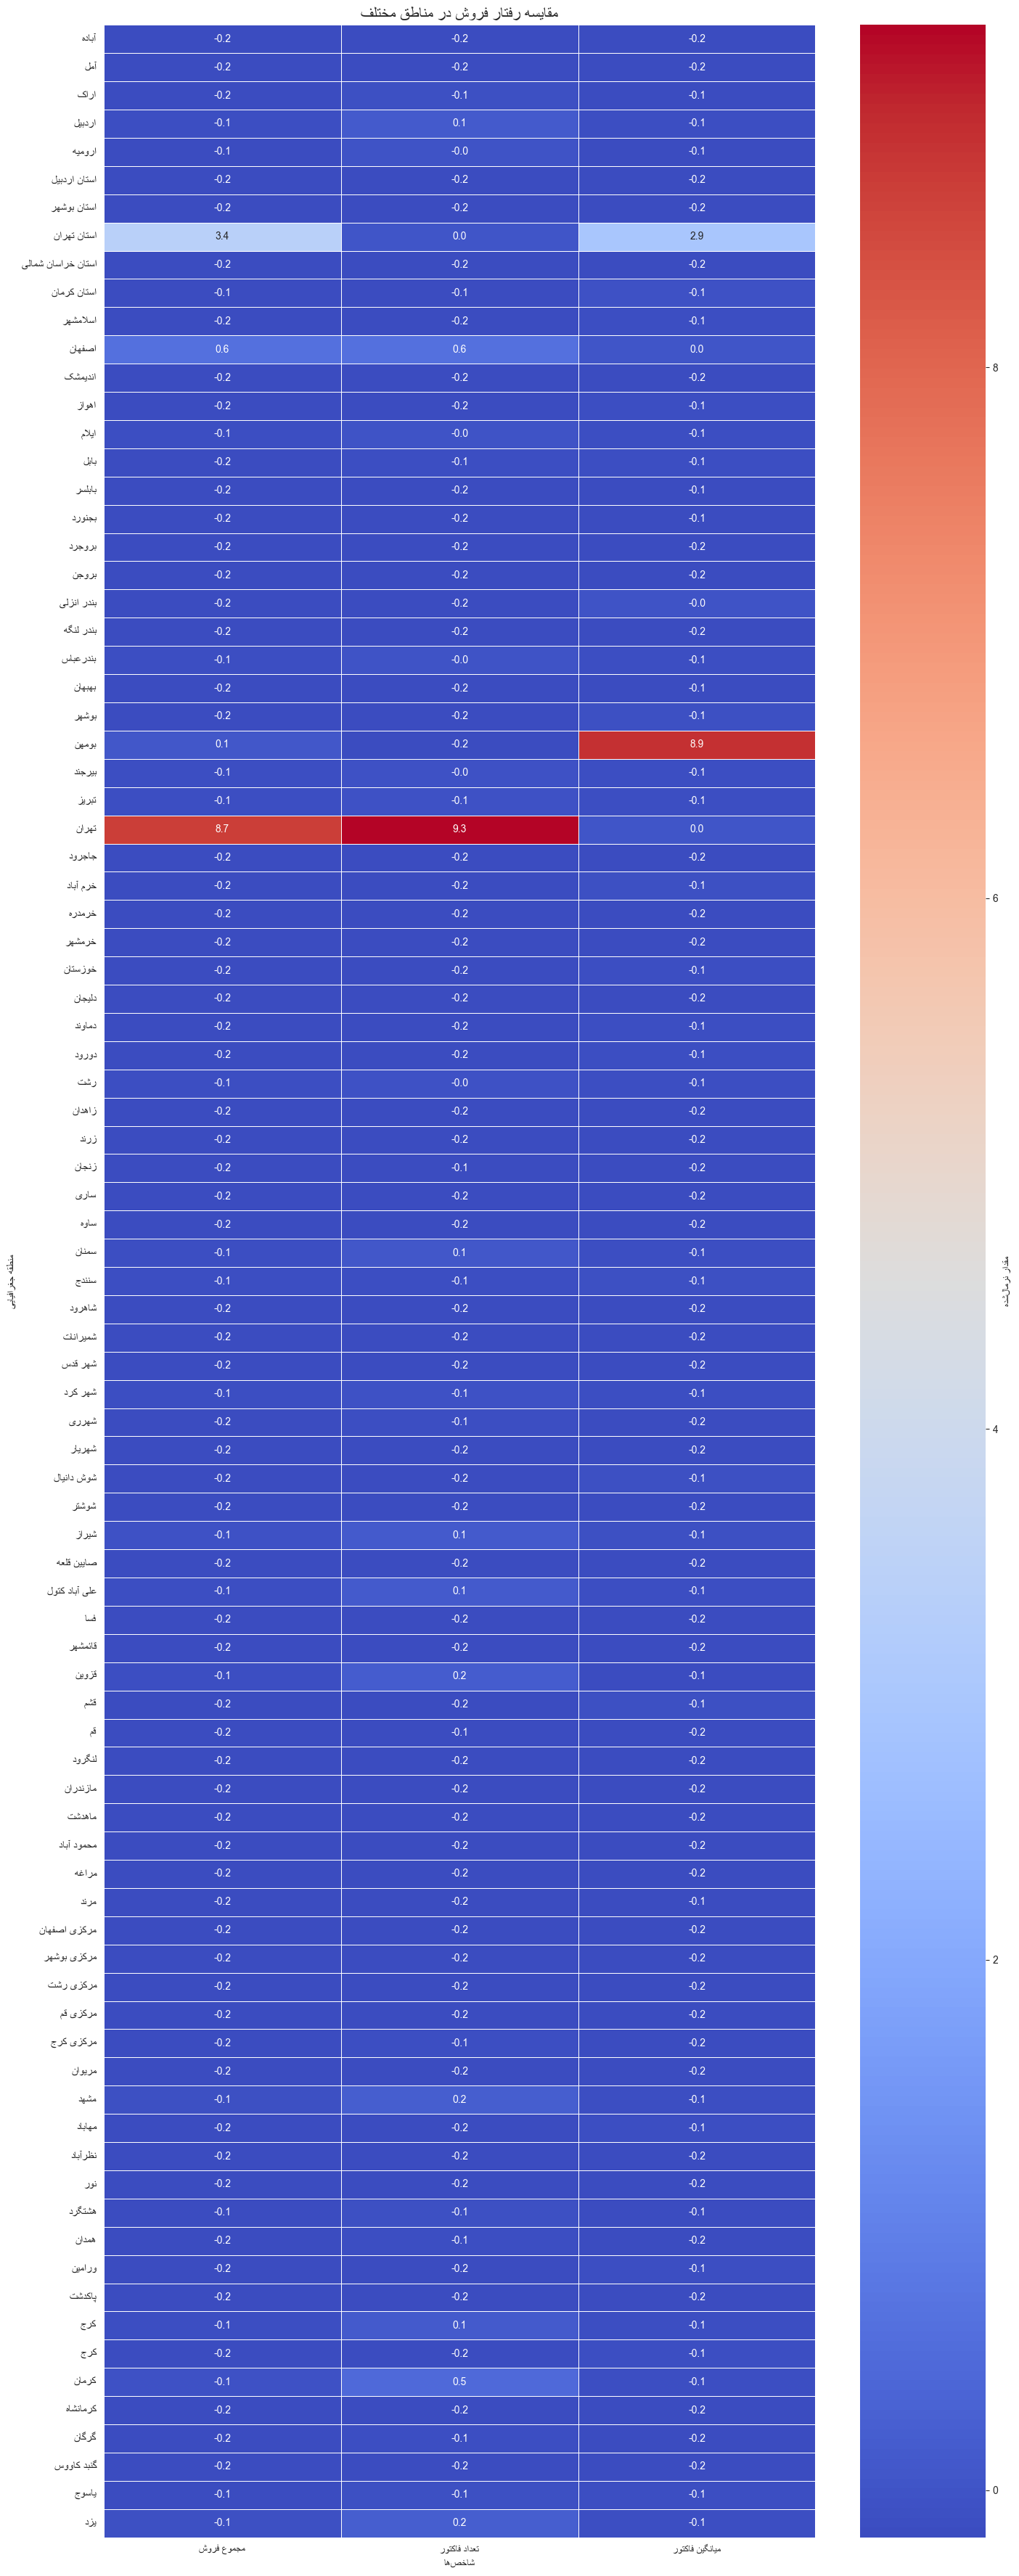

In [123]:
region_summary = df_invoice.groupby('RegionalDivision').agg(
    total_sales=('InvoiceNetPrice', 'sum'),
    invoice_count=('InvoiceNetPrice', 'count'),
    avg_invoice=('InvoiceNetPrice', 'mean')
).reset_index()

features = ['total_sales', 'invoice_count', 'avg_invoice']
scaled_data = StandardScaler().fit_transform(region_summary[features])

city_names = region_summary['RegionalDivision'].apply(reshape_fa)
scaled_df = pd.DataFrame(
    scaled_data,
    index=city_names,
    columns=[reshape_fa('مجموع فروش'), reshape_fa('تعداد فاکتور'), reshape_fa('میانگین فاکتور')]
)

plt.figure(figsize=(14, len(scaled_df) * 0.4))  

ax = sns.heatmap(
    scaled_df,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': reshape_fa('مقدار نرمال‌شده')}
)


ax.set_yticks(np.arange(len(scaled_df)) + 0.5)
ax.set_yticklabels(scaled_df.index, rotation=0, fontsize=11)


plt.title(reshape_fa('مقایسه رفتار فروش در مناطق مختلف'), fontsize=16)
plt.ylabel(reshape_fa('منطقه جغرافیایی'))
plt.xlabel(reshape_fa('شاخص‌ها'))

plt.tight_layout()
plt.show()




<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>مناطق پایدار تر فروش</strong>
</div><div style="direction: rtl; text-align: right;">
<ul> 
  <li>"منطقه‌ای پایدارتر است که فروش آن دارای نوسان کمتر در طول زمان باشد."
</li>

  <li>شهرهایی با ضریب تغییرات کمتر → نوسان کمتر → فروش پایدارتر</li>
  <li> شهرهایی با CV بالا → فروش ناپایدار، متغیر، وابسته به پیک‌های خاص</li>
   <li> دلیل اینکه بعضی شهرها انحراف معیار ندارند:
این شهرها فقط در یک یا دو ماه داده‌ی فروش دارند. چون:
انحراف معیار یعنی میزان پراکندگی داده‌ها نسبت به میانگین
اگر فقط یک مقدار وجود داشته باشه، هیچ پراکندگی‌ای وجود نداره ⇒ در نتیجه انحراف معیار تعریف نشده (NaN) میشه.</li>
  
</ul>
</div>
</div>

In [124]:
best_sales_monthly = df_invoice.groupby(['RegionalDivision', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
monthly_std = best_sales_monthly.groupby('RegionalDivision')['InvoiceNetPrice'].std().reset_index()
monthly_std.columns = ['شهر', 'انحراف معیار فروش ماهانه']

monthly_mean = best_sales_monthly.groupby('RegionalDivision')['InvoiceNetPrice'].mean().reset_index()
monthly_mean.columns = ['شهر', 'میانگین فروش ماهانه']

df_stability = pd.merge(monthly_mean, monthly_std, on='شهر')
df_stability['ضریب تغییرات'] = df_stability['انحراف معیار فروش ماهانه'] / df_stability['میانگین فروش ماهانه']
df_stability = df_stability.sort_values('ضریب تغییرات')  # کمتر = پایدارتر

# df_stability.to_excel('stability_of_sales_by_region.xlsx')
output_path = os.path.join(output_folder, 'stability_of_sales_by_region.xlsx')
df_stability.to_excel(output_path, index=False)
print(df_stability)



           شهر  میانگین فروش ماهانه  انحراف معیار فروش ماهانه  ضریب تغییرات
70    مرکزی قم         1.199000e+08              1.541493e+07      0.128565
1          آمل         2.024000e+07              5.289159e+06      0.261322
21   بندر لنگه         3.665000e+07              9.828784e+06      0.268180
16      بابلسر         3.293617e+08              1.195692e+08      0.363033
75     نظرآباد         8.844932e+07              3.259666e+07      0.368535
..         ...                  ...                       ...           ...
72      مریوان         1.090000e+08                       NaN           NaN
74      مهاباد         6.376500e+08                       NaN           NaN
76         نور         3.158820e+08                       NaN           NaN
80      پاکدشت         1.870000e+07                       NaN           NaN
86  گنبد کاووس         7.085000e+06                       NaN           NaN

[89 rows x 4 columns]


In [125]:
monthly_sales_city_region = df_invoice.groupby(['RegionalDivision', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
# پیک فروش
peak_sales = monthly_sales_city_region.loc[monthly_sales_city_region.groupby('RegionalDivision')['InvoiceNetPrice'].idxmax()]
peak_sales.columns = ['منطقه', 'ماه پیک فروش', 'بیشترین فروش']

# افت فروش
low_sales = monthly_sales_city_region.loc[monthly_sales_city_region.groupby('RegionalDivision')['InvoiceNetPrice'].idxmin()]
low_sales.columns = ['منطقه', 'ماه افت فروش', 'کمترین فروش']

summary = pd.merge(peak_sales, low_sales, on='منطقه')
print(summary.head())

# summary.to_excel('sales_peak_trough_by_region.xlsx', index=False)

output_path = os.path.join(output_folder, 'sales_peak_trough_by_region.xlsx')
summary.to_excel(output_path, index=False)


    منطقه ماه پیک فروش  بیشترین فروش ماه افت فروش  کمترین فروش
0   آباده      1402/07      59950000      1402/07     59950000
1     آمل      1402/11      23980000      1403/05     16500000
2    اراک      1402/12    2082881000      1403/10     15400000
3  اردبیل      1403/12    5838800000      1402/10     10900000
4  ارومیه      1403/08    4125000000      1403/11     22000000


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>دسته‌بندی مناطق براساس فصل پیک و افت فروش</strong>
  </div>
  </div>

In [126]:

peak_sales['شماره ماه'] = peak_sales['ماه پیک فروش'].str[5:].astype(int)
low_sales['شماره ماه'] = low_sales['ماه افت فروش'].str[5:].astype(int)

def get_persian_season(month):
    if month in [1, 2, 3]:
        return 'بهار'
    elif month in [4, 5, 6]:
        return 'تابستان'
    elif month in [7, 8, 9]:
        return 'پاییز'
    else:
        return 'زمستان'

peak_sales['فصل پیک فروش'] = peak_sales['شماره ماه'].apply(get_persian_season)
low_sales['فصل افت فروش'] = low_sales['شماره ماه'].apply(get_persian_season)


regions_by_season_peak = peak_sales.groupby('فصل پیک فروش')['منطقه'].apply(list).reset_index()
regions_by_season_low = low_sales.groupby('فصل افت فروش')['منطقه'].apply(list).reset_index()


def print_regions_by_season(df, season_col, city_col, label):
    print(f"\n {label} به تفکیک فصل:\n")
    for i, row in df.iterrows():
        print(f"\n فصل {row[season_col]}:\n")
        for city in row[city_col]:
            print(f"  - {city}")


print_regions_by_season(regions_by_season_peak, 'فصل پیک فروش', 'منطقه', 'پیک فروش')
print_regions_by_season(regions_by_season_low, 'فصل افت فروش', 'منطقه', 'افت فروش')




 پیک فروش به تفکیک فصل:


 فصل بهار:

  - اسلامشهر
  - ایلام
  - بابلسر
  - بندر لنگه
  - خرمدره
  - دلیجان
  - شهر کرد
  - علی آباد کتول
  - پاکدشت

 فصل تابستان:

  - استان کرمان
  - اندیمشک
  - بروجن
  - بوشهر
  - جاجرود
  - خرم آباد
  - خرمشهر
  - رشت
  - زرند
  - زنجان
  - شهرری
  - فسا
  - قائمشهر
  - قزوین
  - قم
  - محمود آباد
  - مرکزی رشت
  - مرکزی کرج
  - مشهد
  - ورامین
  - کرج
  - کرج 
  - گنبد کاووس
  - یزد

 فصل زمستان:

  - آمل
  - اراک
  - اردبیل
  - استان اردبیل
  - استان بوشهر
  - بابل
  - بجنورد
  - بروجرد
  - بهبهان
  - بومهن
  - بیرجند
  - تبریز
  - تهران
  - خوزستان
  - دماوند
  - دورود
  - زاهدان
  - ساوه
  - شاهرود
  - شمیرانات
  - شوشتر
  - صایین قلعه
  - مازندران
  - ماهدشت
  - مراغه
  - مرکزی اصفهان
  - مرکزی بوشهر
  - مریوان
  - نظرآباد
  - همدان
  - کرمان
  - گرگان
  - یاسوج

 فصل پاییز:

  - آباده
  - ارومیه
  - استان تهران
  - استان خراسان شمالی
  - اصفهان
  - اهواز
  - بندر انزلی
  - بندرعباس
  - ساری
  - سمنان
  - سنندج
  - شهر قدس
  - شهریار
  - شوش 

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار دسته‌بندی مناطق براساس فصل پیک و افت فروشن</strong>
  </div>
  </div>

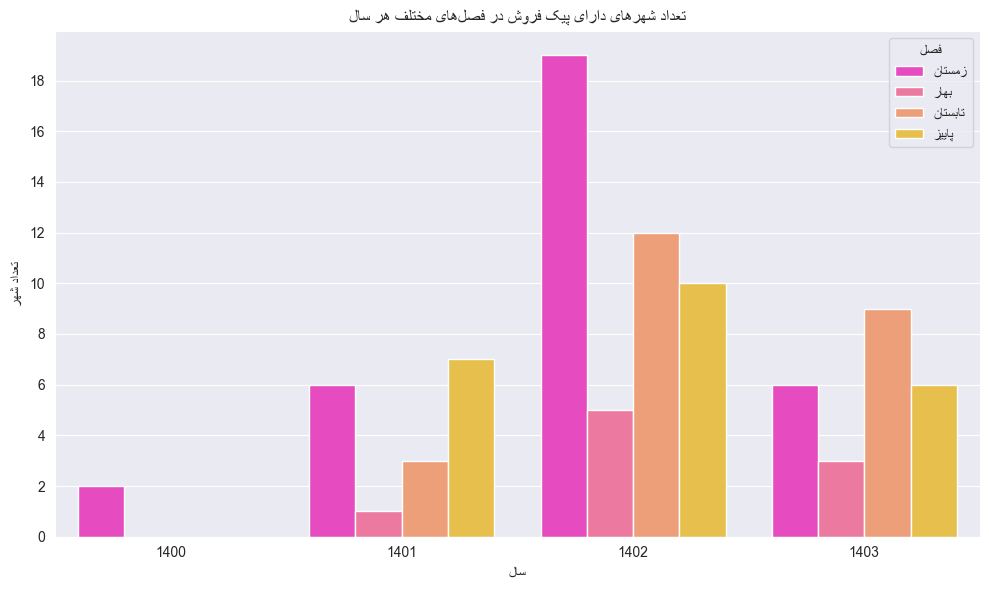

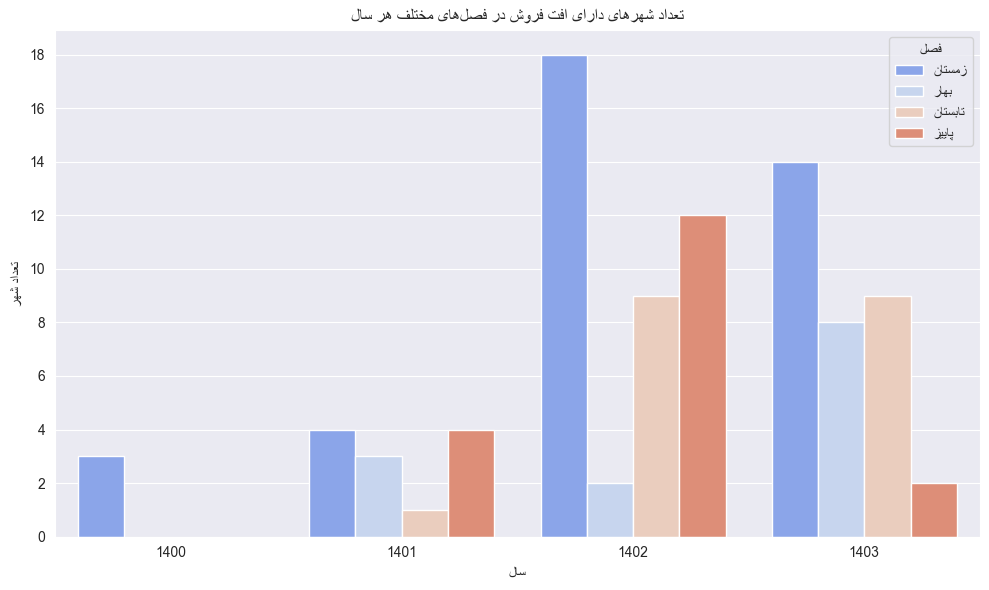

In [127]:
peak_sales['سال'] = peak_sales['ماه پیک فروش'].str[:4].astype(int)
low_sales['سال'] = low_sales['ماه افت فروش'].str[:4].astype(int)


sales_data = [
    {
        'df': peak_sales,
        'season_col': 'فصل پیک فروش',
        'year_col': 'سال',
        'title': 'تعداد شهرهای دارای پیک فروش در فصل‌های مختلف هر سال',
        'palette': 'spring'
    },
    {
        'df': low_sales,
        'season_col': 'فصل افت فروش',
        'year_col': 'سال',
        'title': 'تعداد شهرهای دارای افت فروش در فصل‌های مختلف هر سال',
        'palette': 'coolwarm'
    }
]


for item in sales_data:
    counts = item['df'].groupby([item['year_col'], item['season_col']]).size().reset_index(name='تعداد شهر')
    counts[item['season_col']] = counts[item['season_col']].apply(reshape_fa)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=counts,
                x=item['year_col'],
                y='تعداد شهر',
                hue=item['season_col'],
                palette=item['palette'])


    plt.title(reshape_fa(item['title']))
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xlabel(reshape_fa('سال'))
    plt.ylabel(reshape_fa('تعداد شهر'))
    plt.legend(title=reshape_fa('فصل'))

    plt.tight_layout()
    plt.show()

In [128]:
summary = monthly_sales.describe()
summary


TotalSales
count  3.800000e+01
mean   4.083982e+11
std    5.528202e+11
min    1.674240e+09
25%    1.291336e+11
50%    2.145642e+11
75%    4.201041e+11
max    2.861938e+12

In [129]:
merged_invoice = pd.merge(df_invoice_items, df_invoice, left_on='InvoiceRef', right_on='InvoiceID')
merged_invoice

InvoiceItemID  InvoiceRef  ProductRef  Quantity         Fee  \
0             40184        4524       48933         1     1600000   
1             28012        3104       48935         1     2290000   
2             24582        2685       48929         1     3305000   
3             16946        1867       48891         1     4000000   
4             17195        1884       48891         1     4000000   
...             ...         ...         ...       ...         ...   
8014          37633        4192       48965        40  1936704600   
8015          37634        4192        5044        40   136944900   
8016          37634        4192        5044        40   136944900   
8017          37635        4192       48968       180   143569800   
8018          37635        4192       48968       180   143569800   

            Price          CreationDate_x  InvoiceID  Number       Date  ...  \
0         1600000 2024-12-09 09:27:40.597       4524   12776 2024-12-09  ...   
1         2290000 2024-03-04 08:38:13.067       3104   12130 2024-03-04  ...   
2         3305000 2024-01-09 11:41:41.177       2685   11886 2024-01-09  ...   
3         4000000 2023-08-22 14:46:09.010       1867   11413 2023-08-22  ...   
4         4000000 2023-08-26 10:04:04.550       1884   11417 2023-08-26  ...   
...           ...                     ...        ...     ...        ...  ...   
8014  77468184000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8015   5477796000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8016   5477796000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8017  25842564000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8018  25842564000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   

              CreationDate_y         SalesArea  RegionalDivision  \
0    2024-12-09 09:27:40.597  خدمات پس از فروش             تهران   
1    2024-03-04 08:38:13.067  خدمات پس از فروش             تهران   
2    2024-01-09 11:41:41.177  خدمات پس از فروش             گرگان   
3    2023-08-22 14:46:09.010  خدمات پس از فروش             تهران   
4    2023-08-26 10:04:04.550  خدمات پس از فروش             تهران   
...                      ...               ...               ...   
8014 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8015 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8016 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8017 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8018 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   

      SalesAreaNumber  RegionalDivisionNumber  InvoiceStatusNumber  \
0                   1                      29                    1   
1                   1                      29                    1   
2                   1                      90                    1   
3                   1                      29                    1   
4                   1                      29                    1   
...               ...                     ...                  ...   
8014                2                       7                    1   
8015                2                       7                    1   
8016                2                       7                    1   
8017                2                       7                    1   
8018                2                       7                    1   

      Date_Jalali  Month_Jalali Year_Jalali Month_Jalali_Num  
0      1403/09/19       1403/09        1403                9  
1      1402/12/14       1402/12        1402               12  
2      1402/10/19       1402/10        1402               10  
3      1402/05/31       1402/05        1402                5  
4      1402/06/04       1402/06        1402                6  
...           ...           ...         ...              ...  
8014   1403/07/24       1403/07        1403                7  
8015   1403/07/24       1403/07        1403           

In [130]:
merged_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InvoiceItemID           8019 non-null   uint16        
 1   InvoiceRef              8019 non-null   uint16        
 2   ProductRef              8019 non-null   uint16        
 3   Quantity                8019 non-null   uint16        
 4   Fee                     8019 non-null   uint64        
 5   Price                   8019 non-null   uint64        
 6   CreationDate_x          8019 non-null   datetime64[ns]
 7   InvoiceID               8019 non-null   uint16        
 8   Number                  8019 non-null   uint16        
 9   Date                    8019 non-null   datetime64[ns]
 10  CustomerRef             8019 non-null   uint32        
 11  BrokerRef               8019 non-null   uint8         
 12  Creator                 8019 non-null   uint16  

In [131]:
merged_invoice['Date_Jalali'] = merged_invoice['Date'].apply(to_jalali)
merged_invoice['Month_Jalali'] = merged_invoice['Date_Jalali'].str[:7] 
merged_invoice['Year_Jalali'] = merged_invoice['Date_Jalali'].str[:4]

In [132]:
top_products_by_quantity = df_invoice_items.groupby('ProductRef')['Quantity'].sum().reset_index()
top_products_by_quantity = top_products_by_quantity.sort_values('Quantity', ascending=False)
print(top_products_by_quantity.head(10))
output_path = os.path.join(output_folder, 'top_products_by_quantity.xlsx')
top_products_by_quantity.to_excel(output_path, index=False)


top_products_monthly = merged_invoice.groupby(['ProductRef', 'Month_Jalali'])['Quantity'].sum().reset_index()
print(top_products_monthly.head(10))
output_path = os.path.join(output_folder, 'top_products_by_quantity_monthly.xlsx')
top_products_monthly.to_excel(output_path, index=False)



top_products_yearly = merged_invoice.groupby(['ProductRef', 'Year_Jalali'])['Quantity'].sum().reset_index()
print(top_products_yearly.head(10))
output_path = os.path.join(output_folder, 'top_products_by_quantity_yearly.xlsx')
top_products_yearly.to_excel(output_path, index=False)



     ProductRef  Quantity
318       48755    171844
323       48779     16947
179         824     14002
1            48     10565
180         825      8616
422       49013      7603
182         827      5211
178         823      4593
424       49015      4002
341       48872      3280
   ProductRef Month_Jalali  Quantity
0          41      1401/03         2
1          41      1401/06         4
2          41      1401/07         5
3          41      1401/11        21
4          41      1401/12         6
5          41      1402/03         2
6          41      1402/10         2
7          48      1400/11        96
8          48      1401/01       280
9          48      1401/03      1152
   ProductRef Year_Jalali  Quantity
0          41        1401        38
1          41        1402         4
2          48        1400        96
3          48        1401      3625
4          48        1402       372
5          48        1403      6472
6          49        1400        36
7          52      

In [133]:
merged_invoice

InvoiceItemID  InvoiceRef  ProductRef  Quantity         Fee  \
0             40184        4524       48933         1     1600000   
1             28012        3104       48935         1     2290000   
2             24582        2685       48929         1     3305000   
3             16946        1867       48891         1     4000000   
4             17195        1884       48891         1     4000000   
...             ...         ...         ...       ...         ...   
8014          37633        4192       48965        40  1936704600   
8015          37634        4192        5044        40   136944900   
8016          37634        4192        5044        40   136944900   
8017          37635        4192       48968       180   143569800   
8018          37635        4192       48968       180   143569800   

            Price          CreationDate_x  InvoiceID  Number       Date  ...  \
0         1600000 2024-12-09 09:27:40.597       4524   12776 2024-12-09  ...   
1         2290000 2024-03-04 08:38:13.067       3104   12130 2024-03-04  ...   
2         3305000 2024-01-09 11:41:41.177       2685   11886 2024-01-09  ...   
3         4000000 2023-08-22 14:46:09.010       1867   11413 2023-08-22  ...   
4         4000000 2023-08-26 10:04:04.550       1884   11417 2023-08-26  ...   
...           ...                     ...        ...     ...        ...  ...   
8014  77468184000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8015   5477796000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8016   5477796000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8017  25842564000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   
8018  25842564000 2024-10-15 10:57:37.527       4192   27694 2024-10-15  ...   

              CreationDate_y         SalesArea  RegionalDivision  \
0    2024-12-09 09:27:40.597  خدمات پس از فروش             تهران   
1    2024-03-04 08:38:13.067  خدمات پس از فروش             تهران   
2    2024-01-09 11:41:41.177  خدمات پس از فروش             گرگان   
3    2023-08-22 14:46:09.010  خدمات پس از فروش             تهران   
4    2023-08-26 10:04:04.550  خدمات پس از فروش             تهران   
...                      ...               ...               ...   
8014 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8015 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8016 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8017 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   
8018 2024-10-15 10:57:37.527         مناقصه ای       استان تهران   

      SalesAreaNumber  RegionalDivisionNumber  InvoiceStatusNumber  \
0                   1                      29                    1   
1                   1                      29                    1   
2                   1                      90                    1   
3                   1                      29                    1   
4                   1                      29                    1   
...               ...                     ...                  ...   
8014                2                       7                    1   
8015                2                       7                    1   
8016                2                       7                    1   
8017                2                       7                    1   
8018                2                       7                    1   

      Date_Jalali  Month_Jalali Year_Jalali Month_Jalali_Num  
0      1403/09/19       1403/09        1403                9  
1      1402/12/14       1402/12        1402               12  
2      1402/10/19       1402/10        1402               10  
3      1402/05/31       1402/05        1402                5  
4      1402/06/04       1402/06        1402                6  
...           ...           ...         ...              ...  
8014   1403/07/24       1403/07        1403                7  
8015   1403/07/24       1403/07        1403           

In [134]:
top_products_by_InvoiceNetPrice = merged_invoice.groupby(['ProductRef','Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
top_products_by_InvoiceNetPrice = top_products_by_InvoiceNetPrice.sort_values('InvoiceNetPrice', ascending=False)
# top_products_by_InvoiceNetPrice.to_excel('top_products_by_InvoiceNetPrice.xlsx', index=False)
output_path = os.path.join(output_folder, 'top_products_by_InvoiceNetPrice.xlsx')
top_products_by_InvoiceNetPrice.to_excel(output_path, index=False)
print(top_products_by_InvoiceNetPrice.head(10))

      ProductRef Month_Jalali  InvoiceNetPrice
22            48      1403/07   73087191012000
1909       48964      1403/07   68608959012000
1914       48966      1403/07   36591444806400
1716       48872      1403/07   32017514205600
1916       48968      1403/07   18295722403200
1521        5044      1403/07   18295722403200
1911       48965      1403/07   18295722403200
9             48      1401/03    6749280000000
50            97      1401/03    6749280000000
1921       48979      1403/07    6105825000000


In [135]:
yearly_product_sales = merged_invoice.groupby(['Year_Jalali', 'ProductRef'])['InvoiceNetPrice'].sum().reset_index()
top_products_per_year = yearly_product_sales.sort_values(['Year_Jalali', 'InvoiceNetPrice'], ascending=[True, False])
top_products_per_year = top_products_per_year.groupby('Year_Jalali').first().reset_index()
output_path = os.path.join(output_folder, 'top_products_per_year.xlsx')
top_products_per_year.to_excel(output_path, index=False)
print(top_products_per_year)

  Year_Jalali  ProductRef  InvoiceNetPrice
0        1400         937     408967152967
1        1401          48   12598943106000
2        1402       49098     645188249250
3        1403          48   78542096512000


In [136]:
product_Sales_by_city = merged_invoice.groupby(['RegionalDivision','ProductRef'])['InvoiceNetPrice'].sum().reset_index()
top_product_Sales_by_cities = product_Sales_by_city.sort_values(['RegionalDivision', 'InvoiceNetPrice'], ascending=[True, False])
output_path = os.path.join(output_folder, 'top_product_Sales_by_cities.xlsx')
top_product_Sales_by_cities.to_excel(output_path, index=False)
print(top_product_Sales_by_cities)

# گرفتن پرفروش‌ترین کالا برای هر شهر
top_product_per_city = top_product_Sales_by_cities.groupby('RegionalDivision').first().reset_index()
# top_product_per_city.to_excel('top_product_per_city.xlsx', index=False)
output_path = os.path.join(output_folder, 'top_product_per_city.xlsx')
top_product_per_city.to_excel(output_path, index=False)
print(top_product_per_city)

     RegionalDivision  ProductRef  InvoiceNetPrice
0               آباده       48891         59950000
1                 آمل       48929         40480000
3                اراک         256       2082881000
7                اراک         640       2082881000
12               اراک         827       2082881000
...               ...         ...              ...
1468              یزد         612        148676000
1502              یزد       48984        113300000
1503              یزد       48985        113300000
1499              یزد       48891         54500000
1457              یزد         478         52974000

[1506 rows x 3 columns]
   RegionalDivision  ProductRef  InvoiceNetPrice
0             آباده       48891         59950000
1               آمل       48929         40480000
2              اراک         256       2082881000
3            اردبیل         824     461890970000
4            ارومیه         157       4125000000
..              ...         ...              ...
84         کرمانشاه 

In [137]:


# basket_df = merged_invoice.groupby(['InvoiceRef', 'ProductRef'])['Quantity'].sum().unstack().fillna(0)
# basket_df = (basket_df > 0).astype(int)
# 
# similarity = pd.DataFrame(
#     cosine_similarity(basket_df.T),
#     index=basket_df.columns,
#     columns=basket_df.columns
# )
# 
# 
# product_id = 48
# similarity[product_id].drop(product_id).sort_values(ascending=False).head(10)
# # انتخاب دو کالای مورد نظر
# product_A = 48
# product_B = 97
# 
# # فاکتورهایی که محصول A در آن بوده
# invoices_A = set(df_invoice_items[df_invoice_items['ProductRef'] == product_A]['InvoiceRef'])
# 
# # فاکتورهایی که محصول B در آن بوده
# invoices_B = set(df_invoice_items[df_invoice_items['ProductRef'] == product_B]['InvoiceRef'])
# 
# # اشتراک فاکتورها (هم‌زمان در یک فاکتور)
# common_invoices = invoices_A & invoices_B
# 
# print(f'تعداد فاکتورهایی که هر دو کالا در آن حضور دارند: {len(common_invoices)}')
# print(f'کد فاکتورها: {list(common_invoices)}')


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>کالاهایی که معمولا با هم فروخته می‌شن </strong>
  </div>
  </div>

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
</div><div style="direction: rtl; text-align: right;">
<ul> 
  <li>چه کالاهایی معمولاً با هم در یک فاکتور فروخته می‌شن، و چقدر شباهت فروش دارن (Cosine Similarity).
</li>

  <li>مقدار: 1 اگه کالا در اون فاکتور وجود داشته، 0 اگر نه</li>
  <li> ماتریس کسینوسی بین ستون‌های basket_df (یعنی بین کالاها) محاسبه می‌کنه

خروجی یک DataFrameه که مقدار similarity[A][B] نشون‌دهنده شباهت رفتاری کالاهای A و B در فاکتورهای مختلفه

</li>

  
</ul>
</div>

In [138]:


basket_df = merged_invoice.groupby(['InvoiceRef', 'ProductRef'])['Quantity'].sum().unstack().fillna(0)
basket_df = (basket_df > 0).astype(int)

# 2. محاسبه شباهت کسینوسی
similarity = pd.DataFrame(
    cosine_similarity(basket_df.T),
    index=basket_df.columns,
    columns=basket_df.columns
)

# 3. محاسبه شباهت + فاکتورهای مشترک
results = []

for a, b in combinations(similarity.columns, 2):
    score = similarity.loc[a, b]
    if score > 0.2:
        invoices_a = set(df_invoice_items[df_invoice_items['ProductRef'] == a]['InvoiceRef'])
        invoices_b = set(df_invoice_items[df_invoice_items['ProductRef'] == b]['InvoiceRef'])
        common = invoices_a & invoices_b
        if len(common) > 0:
            results.append({
                'ProductA': a,
                'ProductB': b,
                'CommonInvoices': len(common),
                'InvoiceRefs': ', '.join(map(str, sorted(common))),
                'CosineSimilarity': round(score, 4)
            })


df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='CosineSimilarity', ascending=False)

# df_results.to_excel('product_similarity.xlsx', index=False)
output_path = os.path.join(output_folder, 'product_similarity.xlsx')
df_results.to_excel(output_path, index=False)


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">

  </div></div><div style="direction: rtl; text-align: right;">
<ul> 
  <li> از دیتافریم merged_invoice (که شامل فاکتورها + اقلامشون هست)، همه شناسه‌های یکتای مشتری‌ها (CustomerRef) استخراج می‌شن.
</li>

  <li>purchases: تمام سطرهای فاکتورها و اقلام مربوط به این مشتری
 products_bought: لیست یکتای کالاهایی که مشتری تا حالا خریده

</li>
  <li>  دیکشنری برای نگهداری پیشنهادهای کالاهایی که مشتری هنوز نخریده ولی به یکی از خریدهای قبلی‌ش شباهت دارن.</li>
  <li>  برای هر کالایی که مشتری خریده، ستون مشابهتش رو از similarity می‌گیریم
 .drop(product) باعث می‌شه خودش با خودش مقایسه نشه</li>
  <li>  رای هر کالای مشابه (other_product):

اگر مشتری اون کالا رو نخریده

اگر یا هنوز توی دیکشنری نبوده یا امتیاز شباهتش بهتر از قبل باشه

→ اضافه می‌شه به پیشنهادها، با ذکر:

Score (میزان شباهت)

SimilarTo (به کدوم کالای خرید قبلی شباهت داره)</li>
<li>برای هر کالای مشابه (other_product):

اگر مشتری اون کالا رو نخریده

اگر یا هنوز توی دیکشنری نبوده یا امتیاز شباهتش بهتر از قبل باشه

→ اضافه می‌شه به پیشنهادها، با ذکر:

Score (میزان شباهت)

SimilarTo (به کدوم کالای خرید قبلی شباهت داره)</li>
<li>دیکشنری پیشنهادها تبدیل می‌شه به یک DataFrame با ستون‌های:

ProductRef (کالای پیشنهادی)

Score (میزان شباهت)

SimilarTo (کالای اصلی که بهش شبیهه)

</li>


  
</ul>
</div>

In [139]:
customer_ids = merged_invoice['CustomerRef'].unique()

customer_id = int(input("لطفاً شناسه مشتری (CustomerRef) را وارد کنید: "))

# بررسی کالاهایی که مشتری خریده
purchases = merged_invoice[merged_invoice['CustomerRef'] == customer_id]
products_bought = purchases['ProductRef'].unique()

recommendations = {}

for product in products_bought:
    if product in similarity:
        similar = similarity[product].drop(product)
        for other_product, score in similar.items():
            if other_product not in products_bought:
                if other_product not in recommendations or score > recommendations[other_product]['Score']:
                    recommendations[other_product] = {
                        'Score': score,
                        'SimilarTo': product
                    }


df_recommend = pd.DataFrame([
    {'ProductRef': prod, 'Score': data['Score'], 'SimilarTo': data['SimilarTo']}
    for prod, data in recommendations.items()
])

df_recommend = df_recommend.sort_values(by='Score', ascending=False)
file_path = os.path.join(output_folder, f'recommend_customer_{customer_id}.xlsx')


if not df_recommend.empty:
    df_recommend.to_excel(file_path, index=False)
    print(f" فایل پیشنهادات برای مشتری {customer_id} ذخیره شد: {file_path}")
else:
    print(" پیشنهادی برای این مشتری یافت نشد.")



basket_df = merged_invoice.groupby(['InvoiceRef', 'ProductRef'])['Quantity'].sum().unstack().fillna(0)
basket_df = (basket_df > 0).astype(int)

# 2. محاسبه شباهت کسینوسی
similarity = pd.DataFrame(
    cosine_similarity(basket_df.T),
    index=basket_df.columns,
    columns=basket_df.columns
)

# 3. محاسبه شباهت + فاکتورهای مشترک
results = []

for a, b in combinations(similarity.columns, 2):
    score = similarity.loc[a, b]
    if score > 0.2:
        invoices_a = set(df_invoice_items[df_invoice_items['ProductRef'] == a]['InvoiceRef'])
        invoices_b = set(df_invoice_items[df_invoice_items['ProductRef'] == b]['InvoiceRef'])
        common = invoices_a & invoices_b
        if len(common) > 0:
            results.append({
                'ProductA': a,
                'ProductB': b,
                'CommonInvoices': len(common),
                'InvoiceRefs': ', '.join(map(str, sorted(common))),
                'CosineSimilarity': round(score, 4)
            })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='CosineSimilarity', ascending=False)


# ذخیره خریدهای قبلی
purchase_columns = ['InvoiceRef', 'ProductRef', 'Quantity', 'Price', 'Date']
existing_cols = [col for col in purchase_columns if col in purchases.columns]

purchase_output = purchases[existing_cols].drop_duplicates()

output_path = os.path.join(output_folder, f'purchases_customer_{customer_id}.xlsx')

if not purchase_output.empty:
    purchase_output.to_excel(output_path, index=False)
    print(f" فایل خریدهای قبلی ذخیره شد: {output_path}")
else:
    print(" این مشتری هیچ خریدی در دیتا ندارد.")
    
    
    


 فایل پیشنهادات برای مشتری 3 ذخیره شد: D:\MFTProject\SLSProject\files\recommend_customer_3.xlsx
 فایل خریدهای قبلی ذخیره شد: D:\MFTProject\SLSProject\files\purchases_customer_3.xlsx


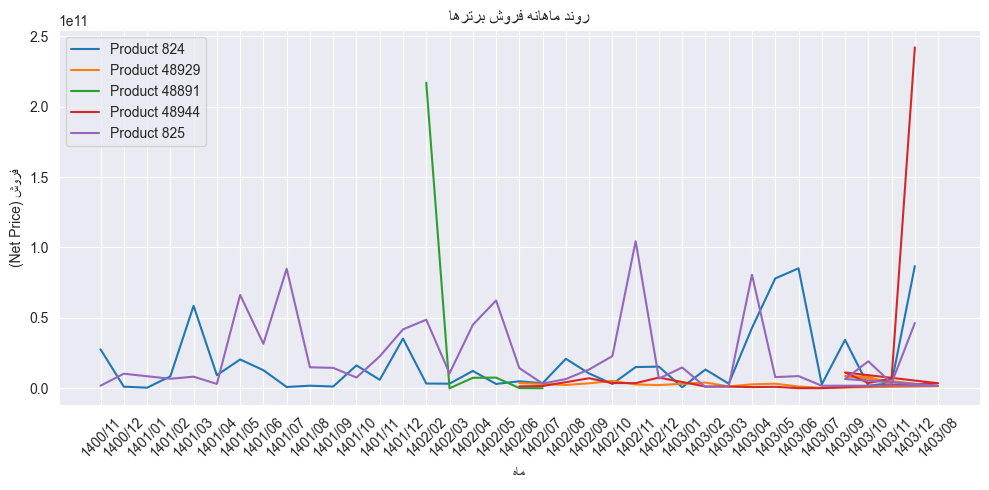

In [140]:
monthly_product_sales = merged_invoice.groupby(['ProductRef', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
# monthly_product_sales.to_excel("monthly_product_sales.xlsx", index=False)
output_path = os.path.join(output_folder, 'monthly_product_sales.xlsx')
monthly_product_sales.to_excel(output_path, index=False)
top_products = merged_invoice['ProductRef'].value_counts().head(5).index

for product in top_products:
    product_data = monthly_product_sales[monthly_product_sales['ProductRef'] == product]
    plt.plot(product_data['Month_Jalali'].astype(str), product_data['InvoiceNetPrice'], label=f'Product {product}')

plt.xticks(rotation=45)
plt.legend()
plt.title(reshape_fa('روند ماهانه فروش برترها'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('فروش (Net Price)'))
plt.tight_layout()
plt.show()

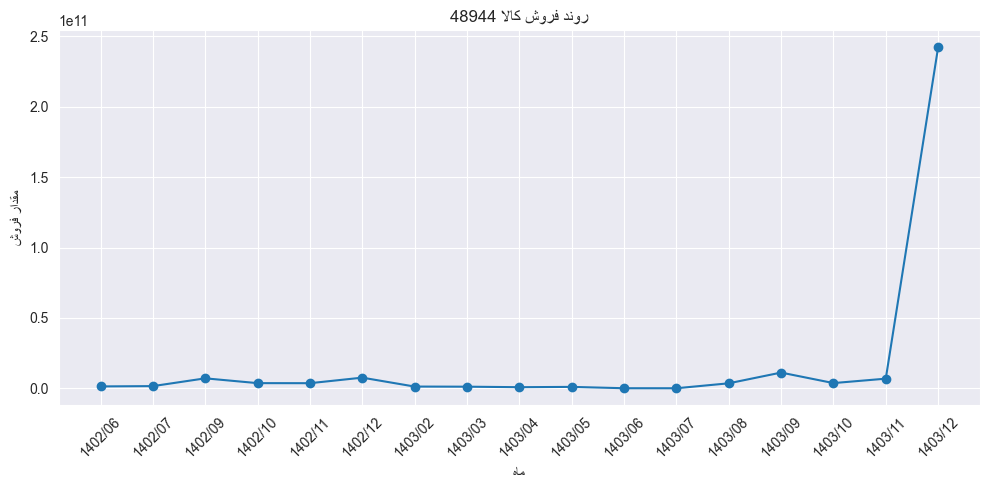

In [141]:
product_id = 48944
filtered = monthly_product_sales[monthly_product_sales['ProductRef'] == product_id]

plt.plot(filtered['Month_Jalali'].astype(str), filtered['InvoiceNetPrice'], marker='o')
plt.title(reshape_fa(f'روند فروش کالا {product_id}'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مقدار فروش'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [142]:
monthly_product_sales['SalesGrowth'] =monthly_product_sales.groupby('ProductRef')['InvoiceNetPrice'].pct_change()
monthly_product_sales['SalesGrowthPercent'] = (monthly_product_sales['SalesGrowth'] * 100).round(2)
top_growth = monthly_product_sales.sort_values('SalesGrowth', ascending=False).head(10)
all_top_growth = monthly_product_sales.sort_values('SalesGrowth', ascending=False)
top_decline = monthly_product_sales.sort_values('SalesGrowth').head(10)
all_top_decline = monthly_product_sales.sort_values('SalesGrowth')
print(top_growth)
print('*' * 10)
print(top_decline)


report_path = os.path.join(output_folder, 'SalesGrowth_Report.xlsx')
with pd.ExcelWriter(report_path) as writer:
    all_top_growth.to_excel(writer, sheet_name='All_Top_Growth', index=False)
    all_top_decline.to_excel(writer, sheet_name='All_Top_Decline', index=False)



      ProductRef Month_Jalali  InvoiceNetPrice  SalesGrowth  \
50            97      1401/03    6749280000000   386.785265   
2256       49236      1403/12    1144863500000   300.589394   
2003       48991      1403/11       4666200000   281.800000   
2007       48992      1403/11       4666200000   281.800000   
2114       49018      1403/04     119506981000   260.339403   
2074       49014      1403/10     231592962902   259.382192   
2062       49013      1403/10     231592962902   259.382192   
1264         826      1401/11      54734241000   220.993369   
1325         865      1401/04     600606350000   211.091994   
2057       49013      1403/04     268291821219   207.656156   

      SalesGrowthPercent  
50              38678.53  
2256            30058.94  
2003            28180.00  
2007            28180.00  
2114            26033.94  
2074            25938.22  
2062            25938.22  
1264            22099.34  
1325            21109.20  
2057            20765.62  
*********

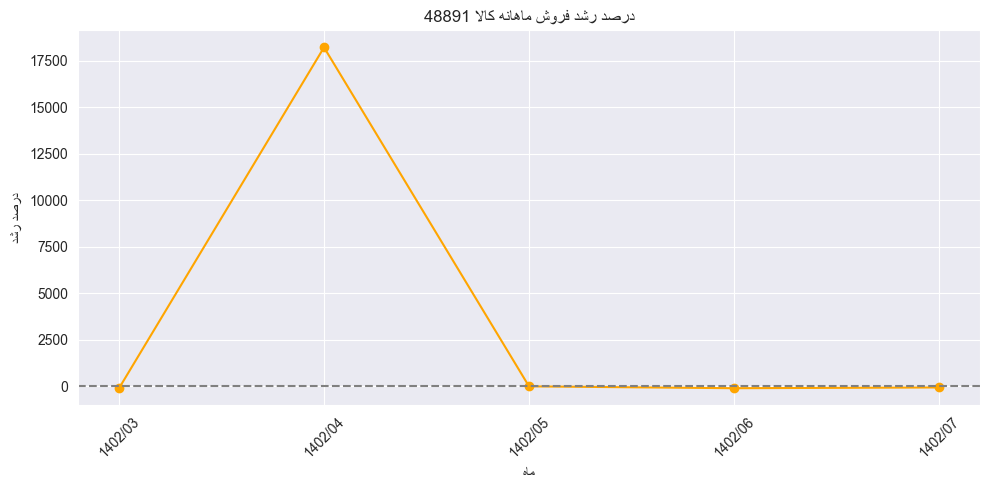

In [143]:
product_id = 48891
product_data =monthly_product_sales[monthly_product_sales['ProductRef'] == product_id].copy()


plt.plot(product_data['Month_Jalali'], product_data['SalesGrowthPercent'], marker='o', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title(reshape_fa(f'درصد رشد فروش ماهانه کالا {product_id}'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('درصد رشد'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
monthly_product_sales[monthly_product_sales['ProductRef'] == 48891][['Month_Jalali', 'InvoiceNetPrice', 'SalesGrowthPercent']]


Month_Jalali  InvoiceNetPrice  SalesGrowthPercent
1729      1402/02     217000111040                 NaN
1730      1402/03         40602500              -99.98
1731      1402/04       7438086053            18219.28
1732      1402/05       7604354480                2.24
1733      1402/06        165680000              -97.82
1734      1402/07         70850000              -57.24

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نرخ وفاداری کالا ها</strong>
  </div>
  </div>

In [145]:


df_sorted = merged_invoice.sort_values(['CustomerRef', 'ProductRef', 'Date'])

# اضافه کردن تاریخ خرید قبلی
df_sorted['PrevPurchase'] = df_sorted.groupby(['CustomerRef', 'ProductRef'])['Date'].shift(1)

# محاسبه فاصله بین خریدها
df_sorted['DaysBetween'] = (df_sorted['Date'] - df_sorted['PrevPurchase']).dt.days

# تعداد خریدها برای هر مشتری و کالا
repeat_counts = df_sorted.groupby(['CustomerRef', 'ProductRef']).size().reset_index(name='PurchaseCount')

# محاسبه نرخ وفاداری برای هر کالا (نرخ مشتری‌هایی که بیش از یکبار آن کالا را خریده‌اند)
repeat = df_sorted.groupby(['CustomerRef', 'ProductRef']).size().reset_index(name='count')
repeat_rate = repeat[repeat['count'] > 1].groupby('ProductRef').size() / repeat.groupby('ProductRef').size()

print(repeat_counts)
print(repeat_rate)


output_path = os.path.join(output_folder, 'customer_product_purchase_counts.xlsx')
repeat_counts.to_excel(output_path, index=False)

#تعداد خرید های هرکالا برای هر مشتری
# repeat_counts.to_excel('customer_product_purchase_counts.xlsx', index=False)

# repeat_rate.reset_index(name='RepeatRate').to_excel('product_repeat_rate.xlsx', index=False)

output_path = os.path.join(output_folder, 'product_repeat_rate.xlsx')
repeat_rate.to_excel(output_path, index=False)


      CustomerRef  ProductRef  PurchaseCount
0               3         477              4
1               3         478              6
2               3         515              2
3               3         531              4
4               3         603              4
...           ...         ...            ...
3091        94405       49317              1
3092        94405       49318              1
3093        94405       49319              1
3094        94407       49306              1
3095        94414       48929              1

[3096 rows x 3 columns]
ProductRef
41       0.250000
48       0.666667
49       1.000000
52       1.000000
53            NaN
           ...   
49314    1.000000
49315    1.000000
49317         NaN
49318         NaN
49319         NaN
Length: 556, dtype: float64


<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>کالاهای پرفروش </strong>
  </div>
  <div style="direction: rtl; text-align: right;">
  <ul> 
  <li> یک کالا پرفروش محسوب میشه اگر:
در اکثر ماه‌ها فروخته شده باشه (مثلاً حداقل در ۸۰٪ ماه‌ها)
</li>
<li>میانگین فروش ماهانه‌اش بالا باشه</li>
<li>واریانس فروشش خیلی کم باشه (یعنی نوسان زیاد نداشته باشه و همیشه فروشش نسبتاً بالا بوده)</li>

</ul>
</div>
</div>

In [146]:

monthly_sales_for_products = merged_invoice.copy()
monthly_sales_for_products['Month'] = monthly_sales_for_products['Date'].dt.to_period('M')
monthly_product_sales = monthly_sales_for_products.groupby(['ProductRef', 'Month'])['InvoiceNetPrice'].sum().reset_index()

active_months = monthly_product_sales.groupby('ProductRef')['Month'].nunique().reset_index(name='ActiveMonths')
total_months = monthly_sales_for_products['Month'].nunique()
active_months['ActiveRate'] = active_months['ActiveMonths'] / total_months

product_stats = monthly_product_sales.groupby('ProductRef')['InvoiceNetPrice'].agg(['mean', 'std']).reset_index()
product_stats.rename(columns={'mean': 'MonthlyAvg', 'std': 'MonthlyStd'}, inplace=True)

result = active_months.merge(product_stats, on='ProductRef')

# شرط: فروش در حداقل 80٪ ماه‌ها + میانگین فروش بالا (مثلاً بالای میانه) + واریانس کم
threshold_avg = result['MonthlyAvg'].median()

fast_moving_products = result[
    (result['ActiveRate'] >= 0.8) & 
    (result['MonthlyAvg'] >= threshold_avg)
]

# fast_moving_products.to_excel("always_fast_moving_products.xlsx", index=False)

output_path = os.path.join(output_folder, 'always_fast_moving_products.xlsx')
fast_moving_products.to_excel(output_path, index=False)





<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>دسته بندی محصولات بر اساس پرفروش /متوسط فروش /کم فروش </strong>
  </div>
  
  <div style="direction: rtl; text-align: right;">
  <ul> 
<li> شناسایی کالاهای حیاتی (گروه A)
کالاهایی که بیش از ۸۰٪ فروش کل رو ایجاد می‌کنن.
این‌ها همون محصولاتی هستن که باید همیشه موجود باشن (موجودی امن).
بررسی مداوم وضعیت انبار، برنامه‌ریزی تأمین سریع و جلوگیری از اتمام موجودی (stock-out).</li>
<li>2. مدیریت گروه B (کالاهای نسبتاً مهم)
حدود ۱۵٪ از فروش کل رو شامل می‌شن.
معمولا اقلام مکمل یا فصلی هستن.</li>
<li>3. ارزیابی گروه C (کالاهای کم‌اهمیت)
فقط حدود ۵٪ از فروش رو تشکیل می‌دن، اما معمولاً تعدادشون زیادتره.

ممکنه باعث انباشتگی موجودی بشن.</li>


</ul>
</div>
</div>

In [147]:

# محاسبه فروش کل برای هر کالا
product_sales = merged_invoice.groupby('ProductRef')['InvoiceNetPrice'].sum().reset_index()

# مرتب‌سازی از بیشترین به کمترین فروش
product_sales = product_sales.sort_values(by='InvoiceNetPrice', ascending=False).reset_index(drop=True)

# محاسبه سهم تجمعی هر کالا از فروش کل
total_sales = product_sales['InvoiceNetPrice'].sum()
product_sales['CumulativeShare'] = product_sales['InvoiceNetPrice'].cumsum() / total_sales

# تابع دسته‌بندی ABC
def assign_abc(row):
    if row['CumulativeShare'] <= 0.8:
        return 'A'
    elif row['CumulativeShare'] <= 0.95:
        return 'B'
    else:
        return 'C'


product_sales['ABC_Category'] = product_sales.apply(assign_abc, axis=1)


print("تعداد کالا در هر دسته:")
print(product_sales['ABC_Category'].value_counts())


category_labels = {
    'A': 'کالاهای بسیار مهم (VIP)',
    'B': 'کالاهای نسبتاً مهم',
    'C': 'کالاهای کم‌اهمیت‌تر'
}


for cat_code in ['A', 'B', 'C']:
    print(f"\n--- کالاهای دسته {category_labels[cat_code]} ---")
    print(product_sales[product_sales['ABC_Category'] == cat_code][['ProductRef', 'InvoiceNetPrice', 'CumulativeShare']])



report_path = os.path.join(output_folder, 'ABC_Product_Categories.xlsx')

# output_path = "ABC_Product_Categories.xlsx"
with pd.ExcelWriter(report_path) as writer:
    for cat_code in ['A', 'B', 'C']:
        df_cat = product_sales[product_sales['ABC_Category'] == cat_code]
        df_cat.to_excel(writer, sheet_name=cat_code, index=False)

print(f"\n فایل خروجی با موفقیت ذخیره شد: {output_path}")

تعداد کالا در هر دسته:
ABC_Category
C    513
B     37
A      6
Name: count, dtype: int64

--- کالاهای دسته کالاهای بسیار مهم (VIP) ---
   ProductRef  InvoiceNetPrice  CumulativeShare
0          48   91499142986000         0.256757
1       48964   69098948512000         0.450657
2       48966   37081434306400         0.554712
3       48872   32017514205600         0.644557
4       48968   20158653028800         0.701125
5       48965   20117343153600         0.757576

--- کالاهای دسته کالاهای نسبتاً مهم ---
    ProductRef  InvoiceNetPrice  CumulativeShare
6         5044   19518976153600         0.812349
7           97   12502714527000         0.847433
8        48979    7571223000000         0.868679
9        49133    3980900000000         0.879850
10         937    3206435167462         0.888847
11         520    1376852167760         0.892711
12         929    1322969293793         0.896423
13       49236    1149033600000         0.899647
14         928    1147873807793         0.90286

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>A تحلیل زمانی کالاهای دسته  </strong>
  </div>
  </div>
  

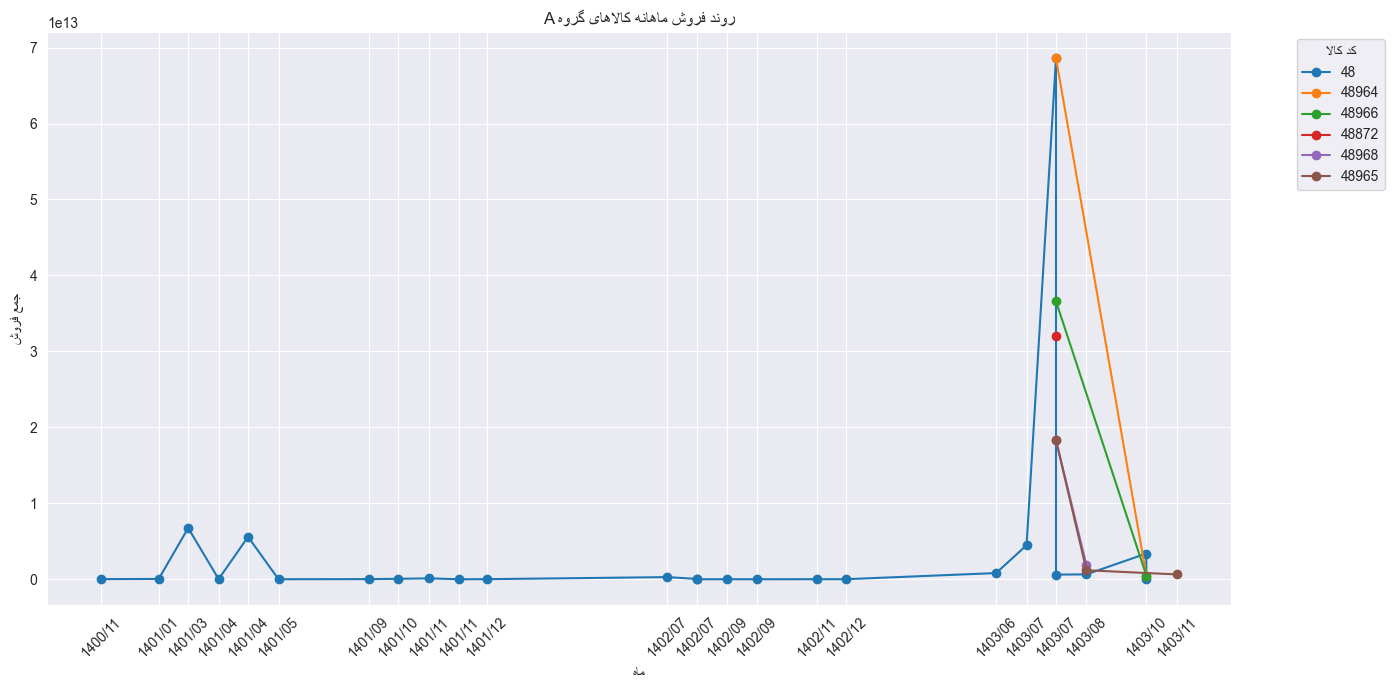

In [148]:

product_sales_A = pd.read_excel('files/ABC_Product_Categories.xlsx', sheet_name='A')
group_a_products = product_sales_A['ProductRef'].unique()

# ۲. فیلتر دیتافریم فروش فقط برای کالاهای گروه A
group_a_sales = monthly_sales_for_products[monthly_sales_for_products['ProductRef'].isin(group_a_products)]

# ۳. جمع فروش ماهانه برای هر کالا
monthly_sales_by_product = (
    group_a_sales
    .groupby(['Month', 'Month_Jalali', 'ProductRef'])['InvoiceNetPrice']
    .sum()
    .reset_index()
)
# تبدیل ماه جلالی به تاریخ میلادی برای مرتب‌سازی (اختیاری اما توصیه‌شده)
monthly_sales_by_product['Month'] = monthly_sales_by_product['Month'].dt.to_timestamp()

# ۴. رسم نمودار برای هر کالا
plt.figure(figsize=(14, 7))

for product_id in group_a_products:
    product_data = monthly_sales_by_product[monthly_sales_by_product['ProductRef'] == product_id]
    plt.plot(product_data['Month'], product_data['InvoiceNetPrice'], marker='o', label=product_id)

plt.title(reshape_fa('روند فروش ماهانه کالاهای گروه A'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('جمع فروش'))
plt.legend(title=reshape_fa('کد کالا'), bbox_to_anchor=(1.05, 1), loc='upper left')

xticks = monthly_sales_by_product['Month'].drop_duplicates()
xtick_labels = monthly_sales_by_product.drop_duplicates('Month')['Month_Jalali']
plt.xticks(xticks, [reshape_fa(label) for label in xtick_labels], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">
 
<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong> کالاهای بدون گردش (Dead Stock)	کالاهایی که در چند ماه اخیر فروشی نداشتن   </strong>
  </div>
  </div>
  

In [149]:
last_date = merged_invoice['Date'].max()

# تاریخ شروع بازه بررسی (مثلاً 3 ماه اخیر)
start_date = last_date - pd.DateOffset(months=3)

# همه کالاهایی که تا به حال فروخته شدند
all_sold_products = merged_invoice['ProductRef'].unique()

# کالاهایی که در سه ماه اخیر فروش داشته‌اند
recent_sales = merged_invoice[merged_invoice['Date'] >= start_date]
recent_sold_products = recent_sales['ProductRef'].unique()

# کالاهایی که در 3 ماه اخیر هیچ فروشی نداشتند
dead_stock_products = set(all_sold_products) - set(recent_sold_products)

# استخراج اطلاعات کالاهای مرده
dead_stock_df = merged_invoice[merged_invoice['ProductRef'].isin(dead_stock_products)][['ProductRef']].drop_duplicates()

print(f"تعداد کالاهای بدون گردش در ۳ ماه اخیر: {len(dead_stock_df)}")
dead_stock_df.head()


تعداد کالاهای بدون گردش در ۳ ماه اخیر: 407


ProductRef
3         48891
93          749
105       48930
214         756
220       49068

<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px; background-color: transparent;">

  <div align="center" style="font-size: 30px; font-weight: bold;">
    <strong>فروش هر مشتری</strong>
  </div>

</div>



<div style="direction: rtl; text-align: right; font-family: 'Tahoma', sans-serif; line-height: 1.8; font-size: 16px; padding: 20px; border-right: 4px solid #00c7c7; border-radius: 8px;">

  <h3>تحلیل:</h3>

  <p>
    <strong>۱. محدوده میانی بسیار کوچک است</strong><br>
    قسمت جعبه (box) که نشان‌دهنده محدوده بین چارک اول (Q1) و سوم (Q3) است، تقریباً به کف نمودار چسبیده.<br>
    یعنی بیشتر مشتری‌ها خرید کمی انجام داده‌اند و در یک بازه کوچک متمرکز هستند.
  </p>

  <p>
    <strong>۲. وجود مقادیر پرت (Outliers) بسیار زیاد و شدید</strong><br>
    نقاط دایره‌ای بالا، مشتریانی هستند که خریدهای بسیار بزرگی انجام داده‌اند (مثلاً بیش از ۱ تریلیون ریال).<br>
    به وضوح چند مشتری داریم که فروش بسیار بالا ایجاد کرده‌اند و باعث کشیدگی شدید نمودار شده‌اند.
  </p>

  <p>
    <strong>برداشت:</strong><br>
    فروش  به شدت به چند مشتری کلیدی وابسته است.<br>
    بیشتر مشتری‌ها خرید کمی دارند ولی یکی دو مشتری احتمالاً پروژه‌ای یا سازمانی هستند که خریدهای بزرگی انجام میدن.<br>
    این وابستگی به مشتریان بزرگ، هم می‌تونه فرصت باشه (تمرکز بازاریابی روی اون‌ها)، هم ریسک (وابستگی بیش از حد).
  </p>

</div>


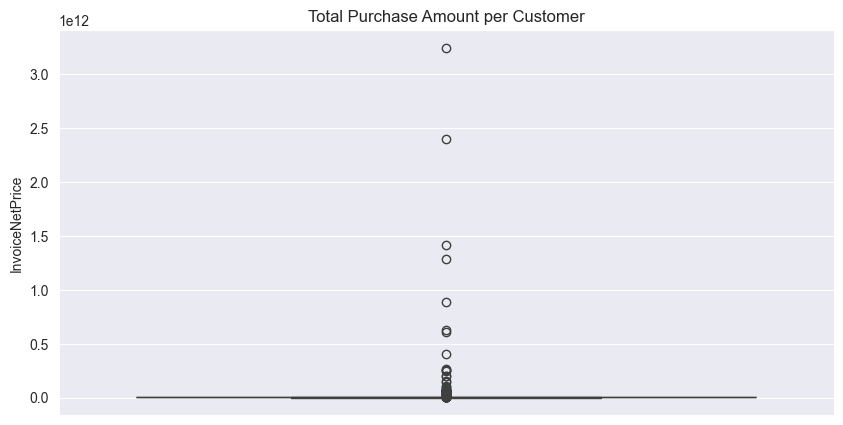

In [150]:
customer_sales = df_invoice.groupby('CustomerRef')['InvoiceNetPrice'].sum().reset_index()

sns.boxplot(y=customer_sales['InvoiceNetPrice'])
plt.title('Total Purchase Amount per Customer')
plt.show()
